<a href="https://colab.research.google.com/github/zumaia/deusto/blob/master/Florence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CONCURSO DE ANÁLISIS DE DATOS CON MOTIVO DE LOS 200 AÑOS DEL NACIMIENTO DE FLORENCE NIGHTINGALE**

Con el objetivo de conmemorar los 200 años del nacimiento de Florence Nightingale, precursora de la estadística y epidemiología moderna, y primera mujer admitida en la Royal Statistical Society, el colectivo de Rladies España (nodos de Barcelona, Madrid y Bilbao) en colaboración con la Sociedad Española de Biometría y la Sociedad Catalana de Estadística se complace en anunciar el concurso: “200 AÑOS DE FLORENCE NIGHTINGALE”.

El objetivo del concurso consiste en analizar el conjunto de datos que Florence Nightingale utilizó para analizar las causas de mortalidad del ejército británico durante la guerra de Crimea y que sirvió para determinar los factores asociados a la alta mortalidad y reducirla significativamente.

https://github.com/rladies/spain_nightingale/blob/master/README.md

https://github.com/rladies/spain_nightingale/blob/master/datos_florence.xlsx

In [ ]:
rm(list=ls())

# Limpiamos la consola
cat("\014")

# Comprobamos que está bien establecido el directorio
getwd()
dir()

[1] "/content"

[1] "sample_data"

## .-Importamos librerias

In [ ]:

# Importamos las librerias a utilizar

packages <- c("ggthemes","visdat", "skimr", "epiDisplay","lubridate","rio","csvy", 
"feather", "fst", "hexView", "readODS", "rmatio", "magrittr", "dplyr", 
"ggfortify", "zoo","GGally","ggplot2","forecast", "tidyquant","dygraphs",
"reshape2")
newpack  = packages[!(packages %in% installed.packages()[,"Package"])]

if(length(newpack)) install.packages(newpack)
a=lapply(packages, library, character.only=TRUE)

In [ ]:
# install.packages("rio")
# library(rio)

raw <- import("https://github.com/rladies/spain_nightingale/raw/master/datos_florence.xlsx")

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...4
* `` -> ...5
* `` -> ...7
* ...



In [ ]:
cat("\nCabecera y primesas líneas: \n")
head(raw)
cat("\nNombre de  las columnas: v")
names(raw)
cat("\nClase: \n")
class(raw)
cat("\nDimensión: \n")
dim(raw)


Cabecera y primesas líneas: 


...1     ...2                 Deaths           ...4             
1 Month    Average size of army Zymotic diseases Wounds & injuries
2 Apr 1854 8571                 1                0                
3 May 1854 23333                12               0                
4 Jun 1854 28333                11               0                
5 Jul 1854 28722                359              0                
6 Aug 1854 30246                828              1                
  ...5             Annual rate of mortality per 1000 ...7             
1 All other causes Zymotic diseases                  Wounds & injuries
2 5                1.4                               0                
3 9                6.2                               0                
4 6                4.7                               0                
5 23               150                               0                
6 30               328.5                             0.4              
  ...8              
1 All other causes  
2 7                 
3 4.5999999999999996
4 2.5               
5 9.6               
6 11.9


Nombre de  las columnas: v

[1] "...1"                              "...2"                             
[3] "Deaths"                            "...4"                             
[5] "...5"                              "Annual rate of mortality per 1000"
[7] "...7"                              "...8"


Clase: 


[1] "data.frame"


Dimensión: 


[1] 25  8

In [ ]:
names(raw) <- c("mes-año", "tamaño","Muertes x Zymotic", "Muertes x Heridas/Lesiones", "Otras Causas", "Tasa anual x1000 Zymotic", "Tasa anual x1000 Heridas/Lesiones","Tasa anual x1000 otras")
d <- raw[c(-1,-2,-3),]
d$`mes-año`[d$`mes-año`=="Aug_1855"]="Aug 1855"
as.Date(d$`mes-año`, "%m %Y")

[1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA

In [ ]:
# simplificamos nombres
names(d)<- c("fecha", "tamaño","zymotic", "heridas", "otras", "zymotic1000año", "heridas1000año","otras1000año")
str(d)

'data.frame':	22 obs. of  8 variables:
 $ fecha         : chr  "Jun 1854" "Jul 1854" "Aug 1854" "Sep 1854" ...
 $ tamaño        : chr  "28333" "28722" "30246" "30290" ...
 $ zymotic       : chr  "11" "359" "828" "788" ...
 $ heridas       : chr  "0" "0" "1" "81" ...
 $ otras         : chr  "6" "23" "30" "70" ...
 $ zymotic1000año: chr  "4.7" "150" "328.5" "312.2" ...
 $ heridas1000año: chr  "0" "0" "0.4" "32.1" ...
 $ otras1000año  : chr  "2.5" "9.6" "11.9" "27.7" ...


In [ ]:
# Convertimos en numeric
atr <- c("tamaño","zymotic", "heridas", "otras", "zymotic1000año", "heridas1000año","otras1000año")
for (i in atr){
  d[,i]<- as.numeric(d[,i])
}
# Redondeamos los últimos números
cols <- names(d[6:8])
for (i in cols){
  d[,i] <- round(d[,i], digits = 2)
}
install.packages("dplyr")
dplyr::glimpse(d)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Rows: 22
Columns: 8
$ fecha          <chr> "Jun 1854", "Jul 1854", "Aug 1854", "Sep 1854", "Oct 1…
$ tamaño         <dbl> 28333, 28722, 30246, 30290, 30643, 29736, 32779, 32393…
$ zymotic        <dbl> 11, 359, 828, 788, 503, 844, 1725, 2761, 2120, 1205, 4…
$ heridas        <dbl> 0, 0, 1, 81, 132, 287, 114, 83, 42, 32, 48, 49, 209, 1…
$ otras          <dbl> 6, 23, 30, 70, 128, 106, 131, 324, 361, 172, 57, 37, 3…
$ zymotic1000año <dbl> 4.7, 150.0, 328.5, 312.2, 197.0, 340.6, 631.5, 1022.8,…
$ heridas1000año <dbl> 0.0, 0.0, 0.4, 32.1, 51.7, 115.8, 41.7, 30.7, 16.3, 12…
$ otras1000año   <dbl> 2.5, 9.6, 11.9, 27.7, 50.1, 42.8, 48.0, 120.0, 140.1, …


## .-ETL

In [ ]:
# convierto la muertes mensuales por 1000
col <- names(d[3:5])
for (i in col){
  d[,i]<- d[,i]/d$tamaño*1000
  d[,i]
}

In [ ]:
df <- dplyr::select(d, -tamaño)
names(df) <- c("fecha","zymotic", "heridas", "otras", "zymoticAÑO", "heridasAÑO","otrasAÑO")

In [ ]:
df$fecha <- gsub("_", " ", df$fecha, fixed = TRUE)

In [ ]:
# install.packages("magrittr")
# library("magrittr")
# Separar fecha
df <- df %>%
  tidyr::separate(fecha, c("mes", "año"), sep = " ")

## .-Resumen de datos

In [ ]:
summary(df)
# install.packages("skimr")
skimr::skim(df)

     mes                año               zymotic           heridas      
 Length:22          Length:22          Min.   : 0.3251   Min.   :0.0000  
 Class :character   Class :character   1st Qu.: 3.0385   1st Qu.:0.1381  
 Mode  :character   Mode  :character   Median :13.4099   Median :1.3699  
                                       Mean   :20.1083   Mean   :2.2017  
                                       3rd Qu.:27.0354   3rd Qu.:3.3939  
                                       Max.   :85.2345   Max.   :9.6516  
     otras           zymoticAÑO        heridasAÑO         otrasAÑO      
 Min.   : 0.2118   Min.   :   3.90   Min.   :  0.000   Min.   :  2.500  
 1st Qu.: 0.6756   1st Qu.:  36.48   1st Qu.:  1.625   1st Qu.:  8.125  
 Median : 0.9186   Median : 160.90   Median : 16.450   Median : 11.000  
 Mean   : 2.4075   Mean   : 241.30   Mean   : 26.423   Mean   : 28.882  
 3rd Qu.: 3.2513   3rd Qu.: 324.43   3rd Qu.: 40.700   3rd Qu.: 39.025  
 Max.   :11.6757   Max.   :1022.80   Max.   

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             22    
Number of columns          8     
_______________________          
Column type frequency:           
  character                2     
  numeric                  6     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 mes                   0             1     3     3     0       12          0
2 año                   0             1     4     4     0        3          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   mean     sd    p0    p25     p50
1 zymotic               0             1  20.1   23.1  0.325  3.04   13.4  
2 heridas               0             1   2.20   2.45 0      0.138   1.

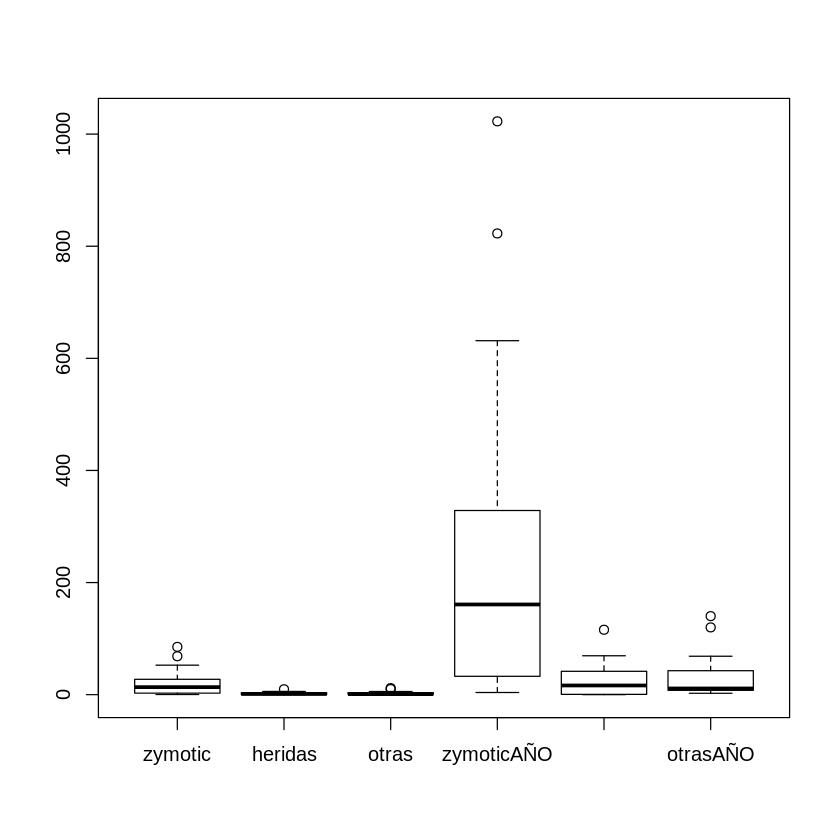

In [ ]:
boxplot(df[3:8])

In [ ]:
#install.packages("epiDisplay")
#library(epiDisplay)
epiDisplay::codebook(df)


 
 
mes 	 : 	  
A character vector 

año 	 : 	  
A character vector 

zymotic 	 : 	  
 obs. mean   median  s.d.   min.   max.  
 22   20.108 13.41   23.092 0.325  85.234

heridas 	 : 	  
 obs. mean   median  s.d.   min.   max.  
 22   2.202  1.37    2.449  0      9.652 

otras 	 : 	  
 obs. mean   median  s.d.   min.   max.  
 22   2.407  0.919   3.115  0.212  11.676

zymoticAÑO 	 : 	  
 obs. mean   median  s.d.    min.   max.  
 22   241.3  160.9   277.098 3.9    1022.8

heridasAÑO 	 : 	  
 obs. mean   median  s.d.   min.   max.  
 22   26.423 16.45   29.377 0      115.8 

otrasAÑO 	 : 	  
 obs. mean   median  s.d.   min.   max.  
 22   28.882 11      37.386 2.5    140.1 



No. of observations = 22

  Var. name  obs. mean   median  s.d.   min.   max.  
1 mes                                                
2 año                                                
3 zymotic    22   20.11  13.41   23.09  0.33   85.23 
4 heridas    22   2.2    1.37    2.45   0      9.65  
5 otras      22   2.41   0.92    3.12   0.21   11.68 
6 zymoticAÑO 22   241.3  160.9   277.1  3.9    1022.8
7 heridasAÑO 22   26.42  16.45   29.38  0      115.8 
8 otrasAÑO   22   28.88  11      37.39  2.5    140.1

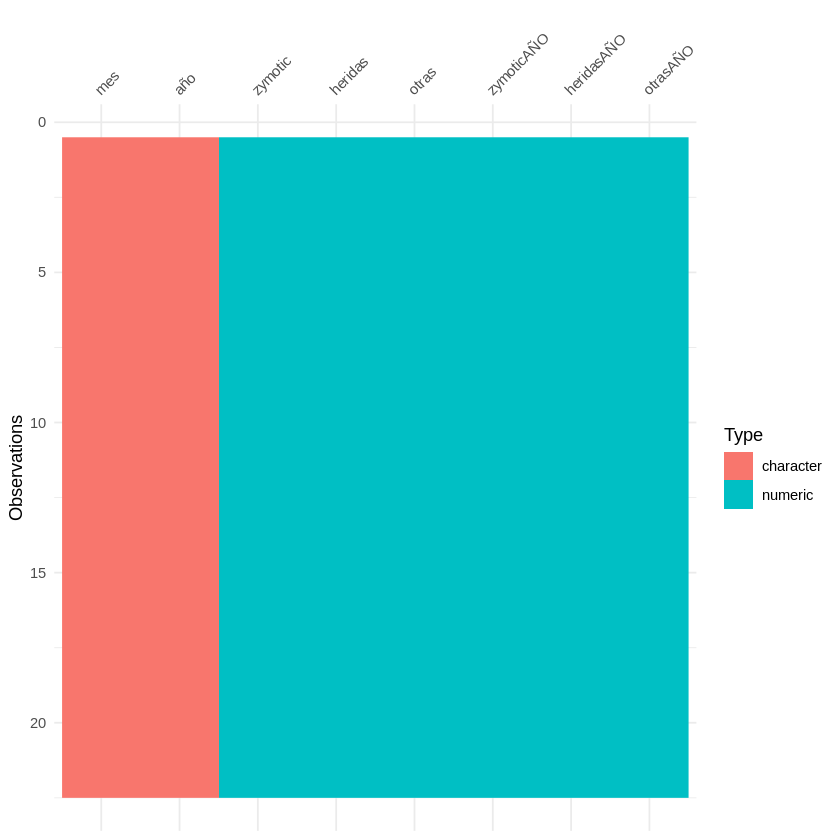

In [ ]:
epiDisplay::summ(df)
#install.packages("visdat")
visdat::vis_dat(df)

## .- Matrices

In [ ]:
#install.packages("mnormt")
#install.packages("psych")
#library("psych")
#pairs.panels(df, pch=21,main="Matriz de Dispersión, Histograma y Correlación")

ERROR while rich displaying an object: Error in farver::decode_colour(colors, alpha = TRUE, to = "lab", na_value = "transparent"): unused argument (na_value = "transparent")

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = e

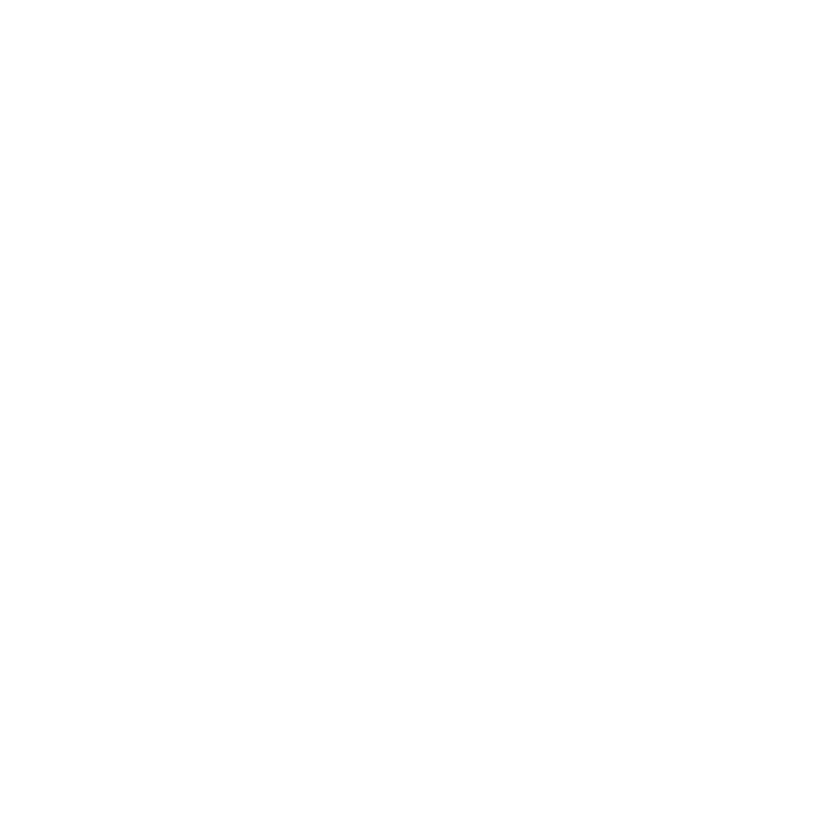

In [ ]:
#install.packages("ggplot2")
#install.packages("GGally")
#library("ggplot2","GGally")
textscatter <- function(df, mapping, ...) {
   ggplot(df, mapping, ...) + geom_text()
}

ggpairs(
  df, 
  title="Scatterplot de Variables",
  columns = c(3:8),
  mapping=ggplot2::aes(colour = año))
  lower = list(continuous = textscatter)


# .- Time-Series

In [ ]:
pas1.ts <- ts(df["zymotic"], start = c(1854, 6), frequency = 12)
str(pas1.ts)

pas1.ts



 Time-Series [1:22, 1] from 1854 to 1856: 0.388 12.499 27.376 26.015 16.415 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr "zymotic"


Jan        Feb        Mar        Apr        May        Jun       
1854                                                         0.3882399
1855 85.2344642 68.5662538 40.0239147 14.7897805 14.3207510 20.6365952
1856  0.9499683  0.5519145  0.3250975                                 
     Jul        Aug        Sep        Oct        Nov        Dec       
1854 12.4991296 27.3755207 26.0151865 16.4148419 28.3831047 52.6251564
1855  8.9572537 10.8261981  3.9580323  2.7320072  4.7024014  2.1056529
1856

In [ ]:
pas2.ts <- ts(df[c(4)], start = c(1854, 6), frequency = 12)
pas3.ts <- ts(df[c(5)], start = c(1854, 6), frequency = 12)
pas4.ts <- ts(df[c(6)], start = c(1854, 6), frequency = 12)
pas5.ts <- ts(df[c(7)], start = c(1854, 6), frequency = 12)
pas6.ts <- ts(df[c(8)], start = c(1854, 6), frequency = 12)

In [ ]:
pass.ts <- ts(df[c(3:8)], start = c(1854, 6), frequency = 12)
str(pass.ts)

pass.ts

 Time-Series [1:22, 1:6] from 1854 to 1856: 0.388 12.499 27.376 26.015 16.415 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:6] "zymotic" "heridas" "otras" "zymoticAÑO" ...


zymotic    heridas    otras      zymoticAÑO heridasAÑO otrasAÑO
Jun 1854  0.3882399 0.00000000  0.2117672    4.7       0.0        2.5   
Jul 1854 12.4991296 0.00000000  0.8007799  150.0       0.0        9.6   
Aug 1854 27.3755207 0.03306222  0.9918667  328.5       0.4       11.9   
Sep 1854 26.0151865 2.67414988  2.3109937  312.2      32.1       27.7   
Oct 1854 16.4148419 4.30767223  4.1771367  197.0      51.7       50.1   
Nov 1854 28.3831047 9.65160075  3.5647027  340.6     115.8       42.8   
Dec 1854 52.6251564 3.47783642  3.9964611  631.5      41.7       48.0   
Jan 1855 85.2344642 2.56228197 10.0021610 1022.8      30.7      120.0   
Feb 1855 68.5662538 1.35838805 11.6756687  822.8      16.3      140.1   
Mar 1855 40.0239147 1.06287574  5.7129571  480.3      12.8       68.6   
Apr 1855 14.7897805 1.48827980  1.7673323  177.5      17.9       21.2   
May 1855 14.3207510 1.38133228  1.0430468  171.8      16.6       12.5   
Jun 1855 20.6365952 5.37786584  0.7976739  247.6      64.5        9.6   
Jul 1855  8.9572537 3.14207330  0.7737942  107.5      37.7        9.3   
Aug 1855 10.8261981 3.67597615  0.5603622  129.9      44.1        6.7   
Sep 1855  3.9580323 5.77998367  0.4188394   47.5      69.4        5.0   
Oct 1855  2.7320072 1.13122172  0.3841885   32.8      13.6        4.6   
Nov 1855  4.7024014 0.87179352  0.8453755   56.4      10.5       10.1   
Dec 1855  2.1056529 0.41650277  0.6478932   25.3       5.0        7.8   
Jan 1856  0.9499683 0.04523659  1.0856781   11.4       0.5       13.0   
Feb 1856  0.5519145 0.00000000  0.4369323    6.6       0.0        5.2   
Mar 1856  0.3250975 0.00000000  0.7585609    3.9       0.0        9.1

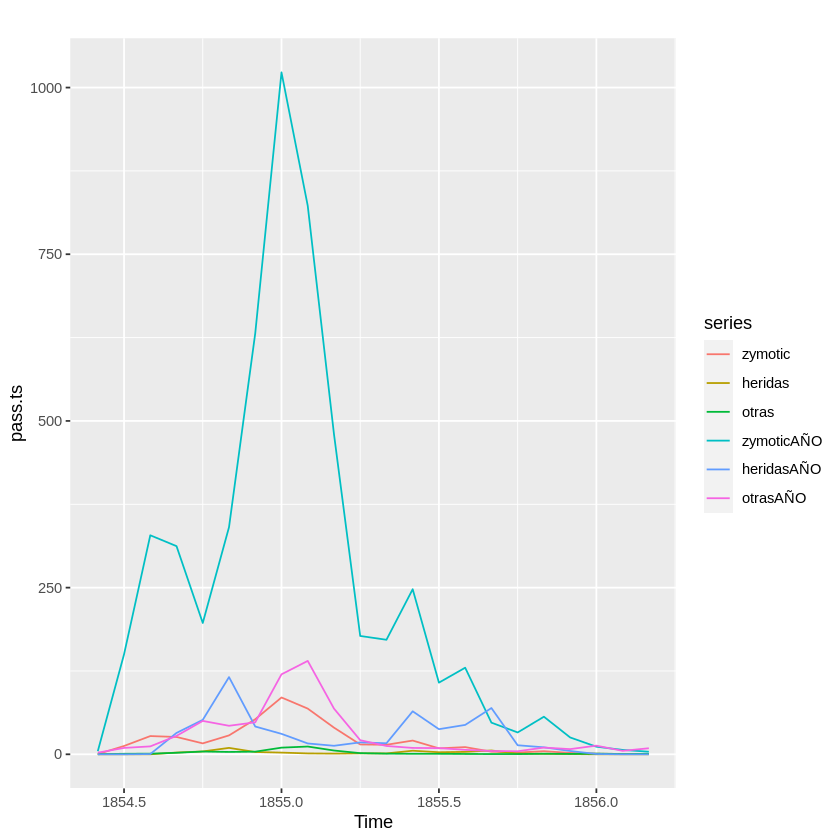

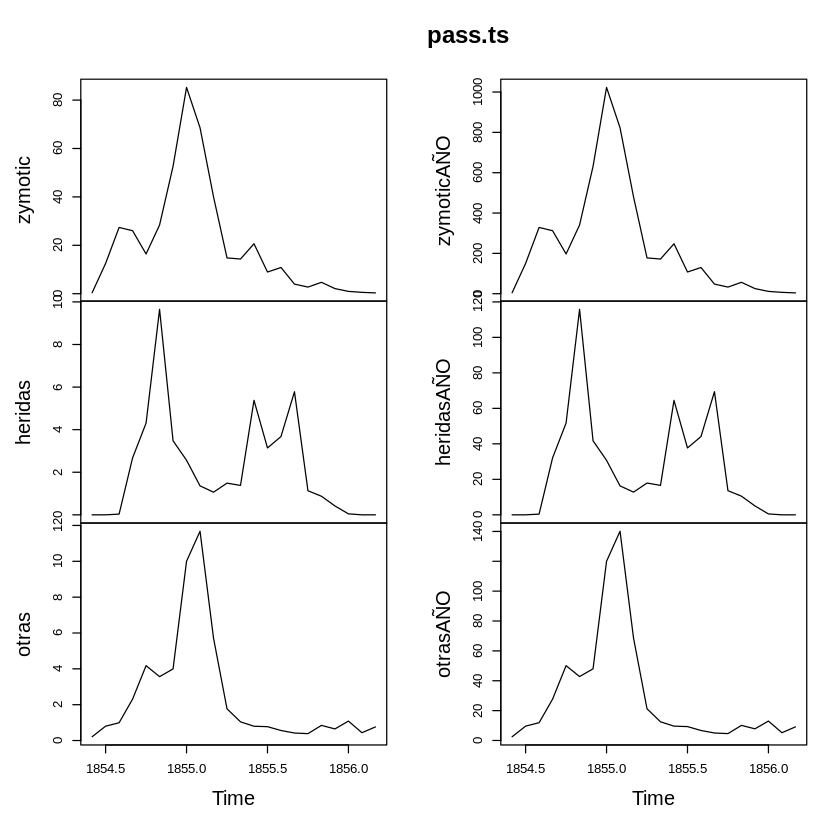

In [ ]:
autoplot(pass.ts)
plot(pass.ts)

Warning message:
“Ignoring unknown parameters: ts.colour, ts.linetype”


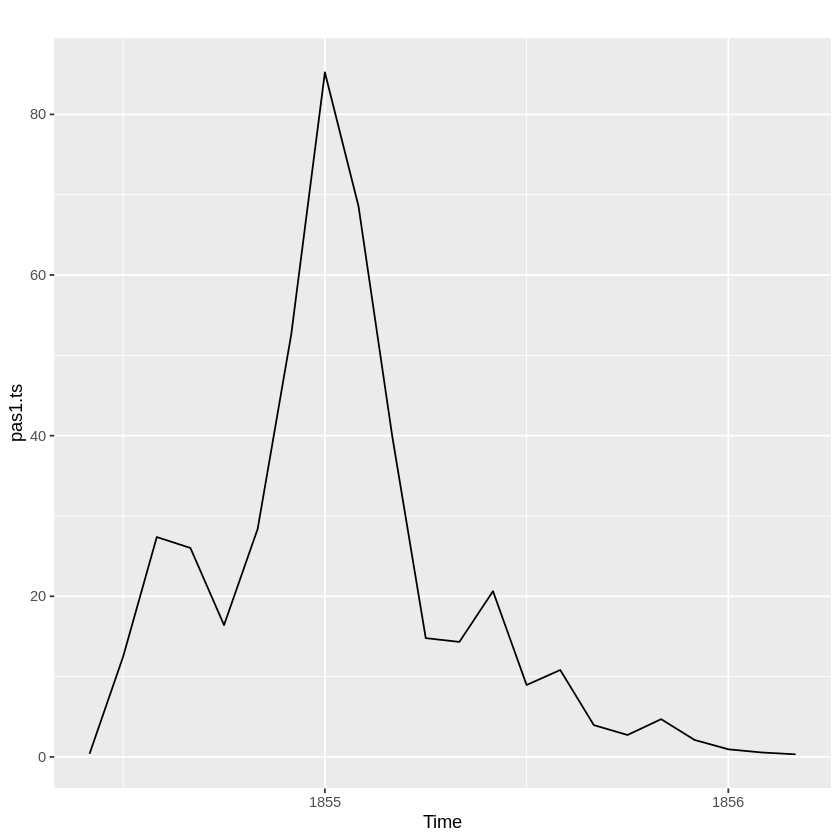

In [ ]:
autoplot(pas1.ts, ts.colour = "red", ts.linetype = "dashed")

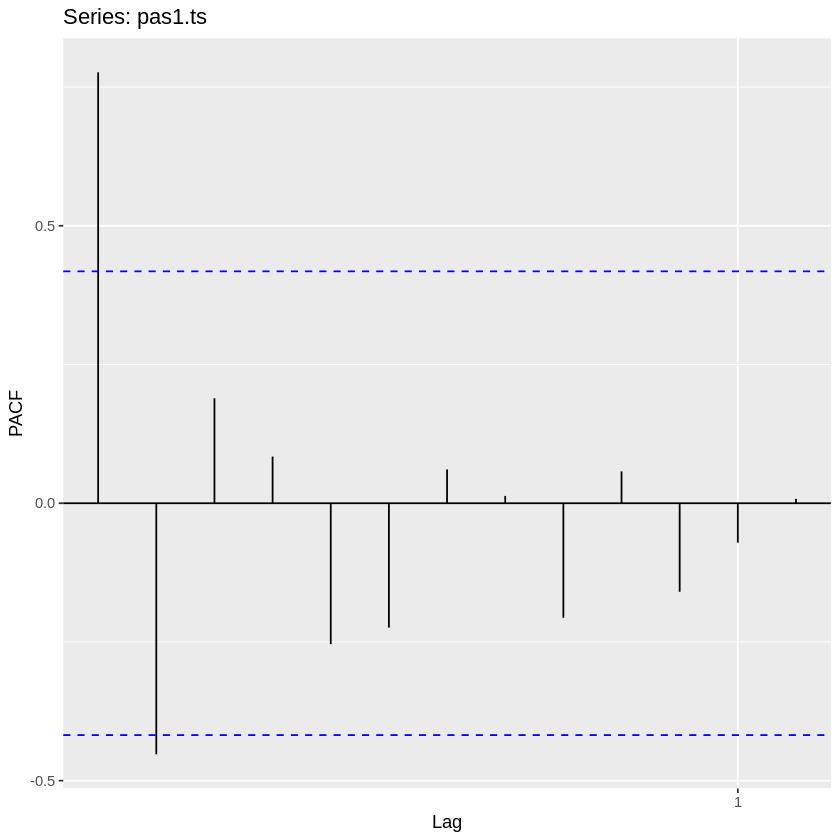

In [ ]:
autoplot(pacf(pas1.ts, plot = FALSE))

Warning message:
“Ignoring unknown parameters: conf.int.fill, conf.int.value, conf.int.type”


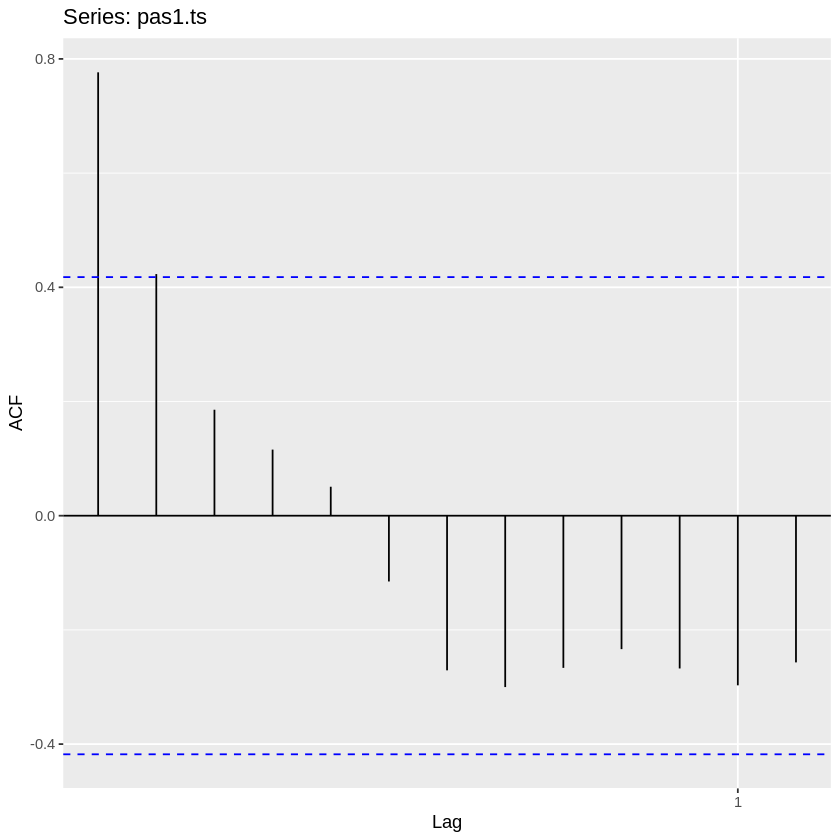

In [ ]:
autoplot(acf(pas1.ts, plot = FALSE), conf.int.fill = "#0000FF", conf.int.value = 0.8,
         conf.int.type = "ma")

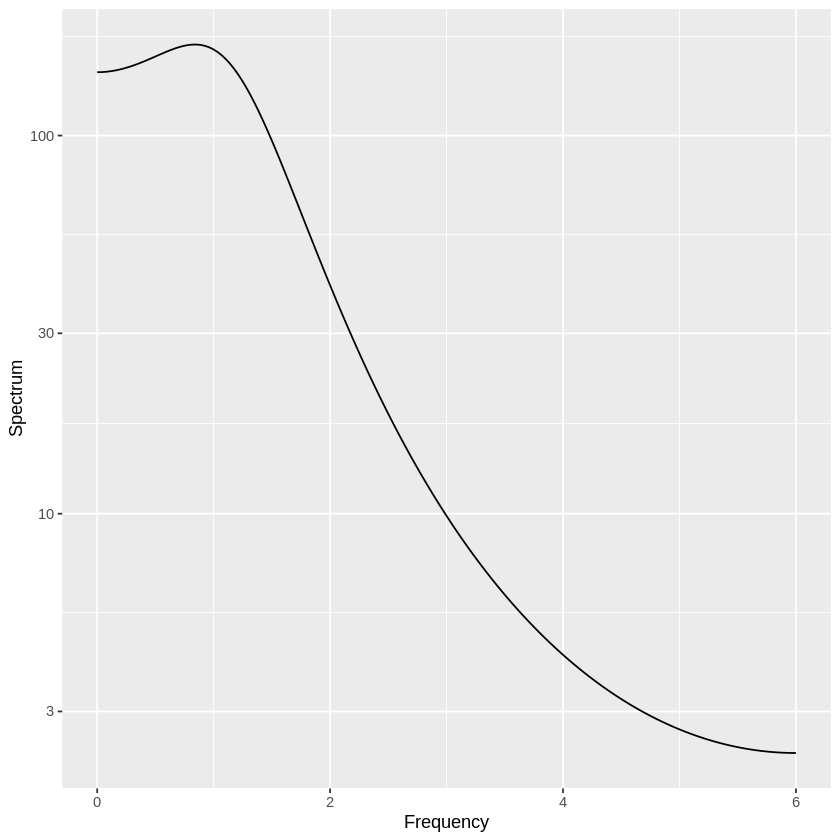

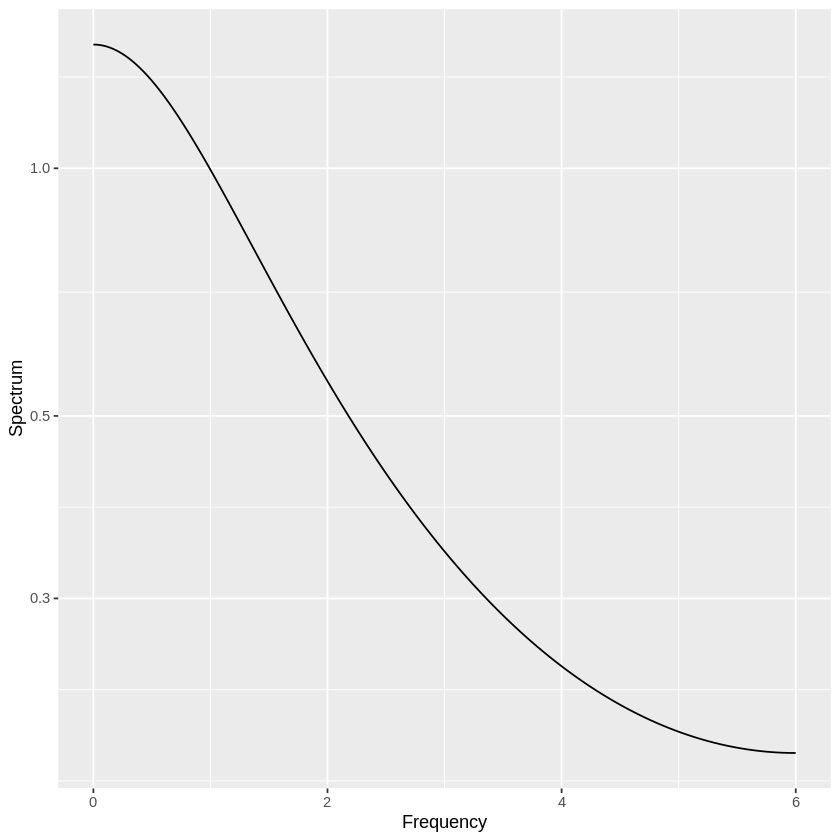

In [ ]:
autoplot(spec.ar(pas1.ts, plot = FALSE))
autoplot(spec.ar(pas2.ts, plot = FALSE))

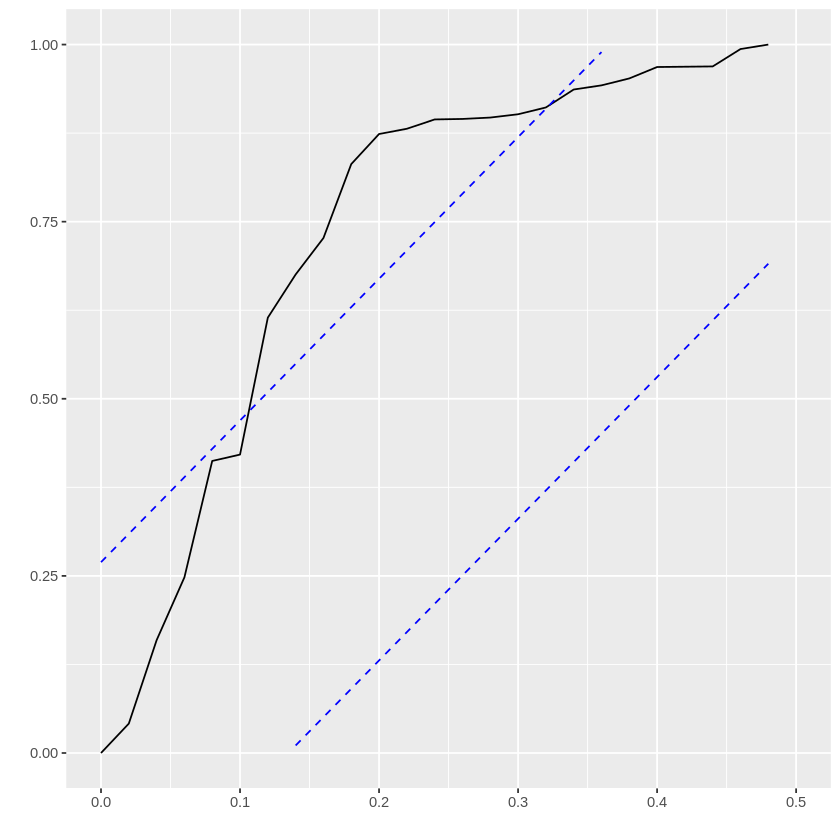

In [ ]:
ggcpgram(arima.sim(list(ar = c(0.7, -0.5)), n = 50))

Warning message:
“The chosen seasonal unit root test encountered an error when testing for the first difference.
From stl(): series is not periodic or has less than two periods
0 seasonal differences will be used. Consider using a different unit root test.”


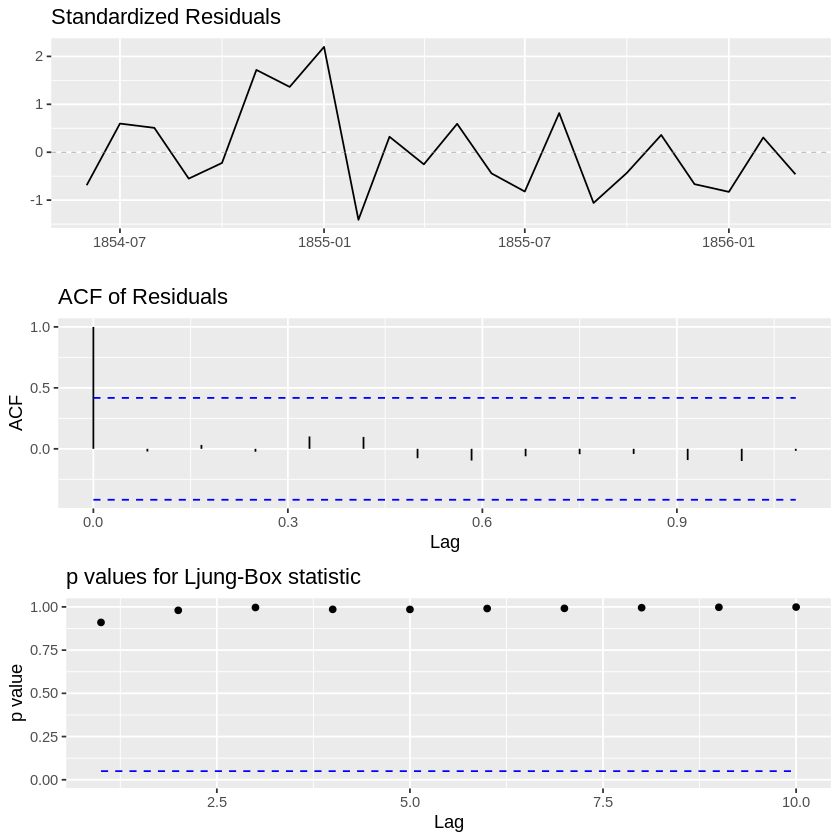

In [ ]:
ggtsdiag(auto.arima(pas1.ts))

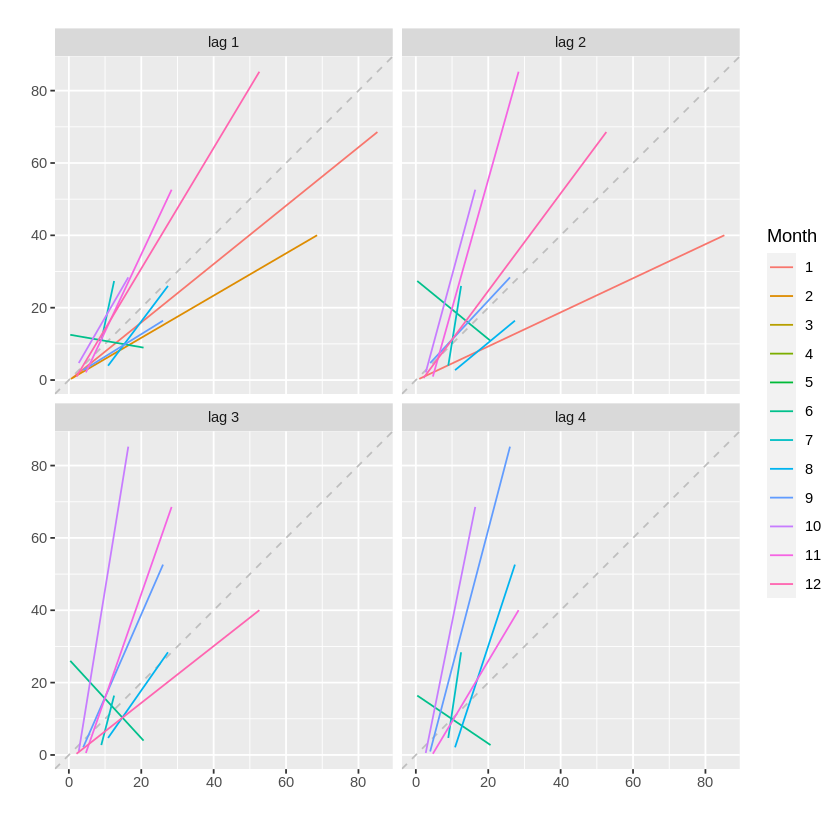

In [ ]:
gglagplot(pas1.ts, lags = 4)

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



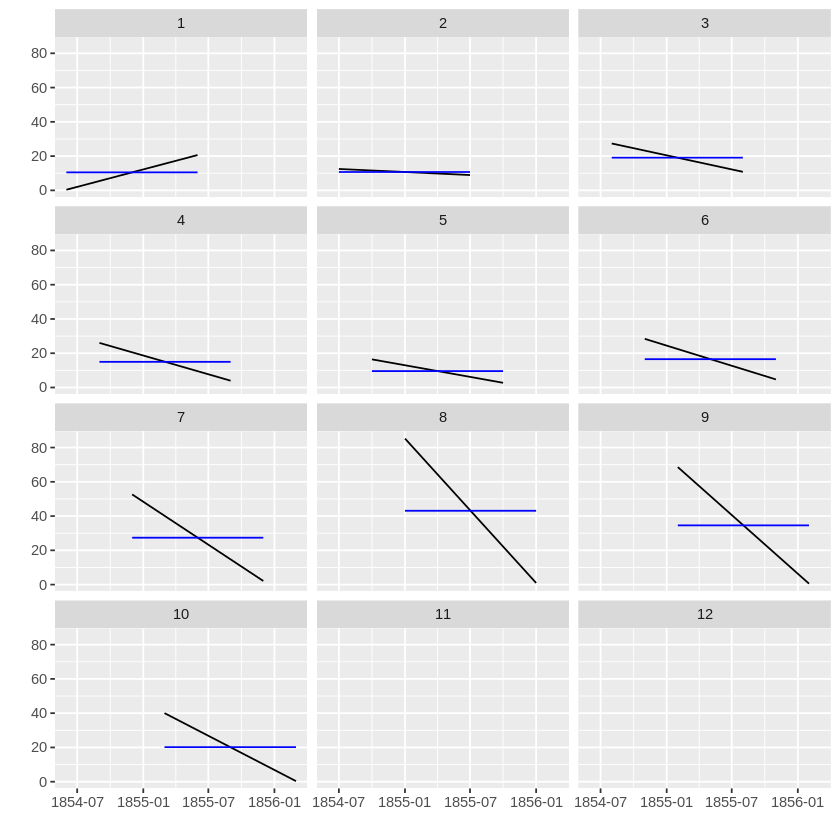

In [ ]:
ggfreqplot(pas1.ts)

Periodograma acumulado

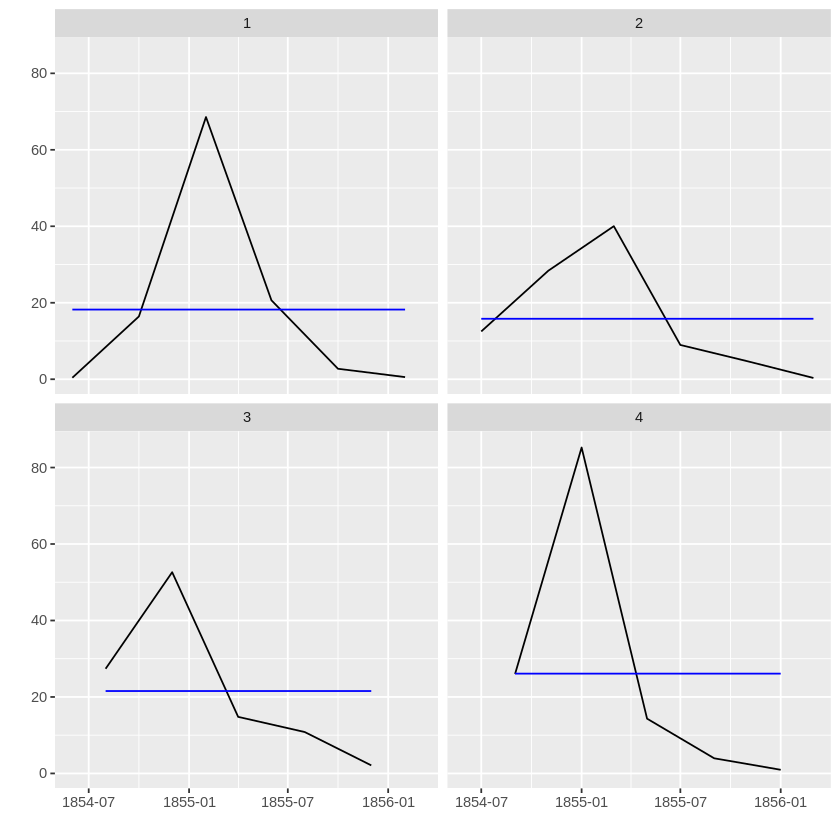

In [ ]:
ggfreqplot(pas1.ts, freq = 4)

ggtsdiag debería generar el diagrama similar a tsdiag.

Warning message:
“The chosen seasonal unit root test encountered an error when testing for the first difference.
From stl(): series is not periodic or has less than two periods
0 seasonal differences will be used. Consider using a different unit root test.”


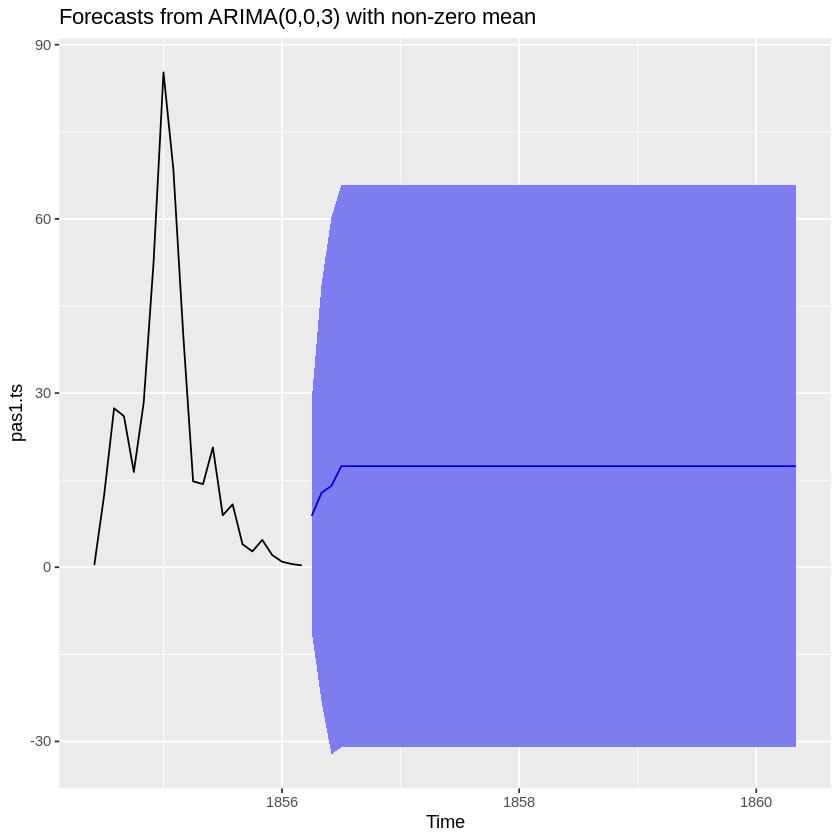

In [ ]:
arima1<-forecast::auto.arima(pas1.ts)
forecast1<-forecast::forecast(arima1,level = c(95), h = 50)
autoplot(forecast1)

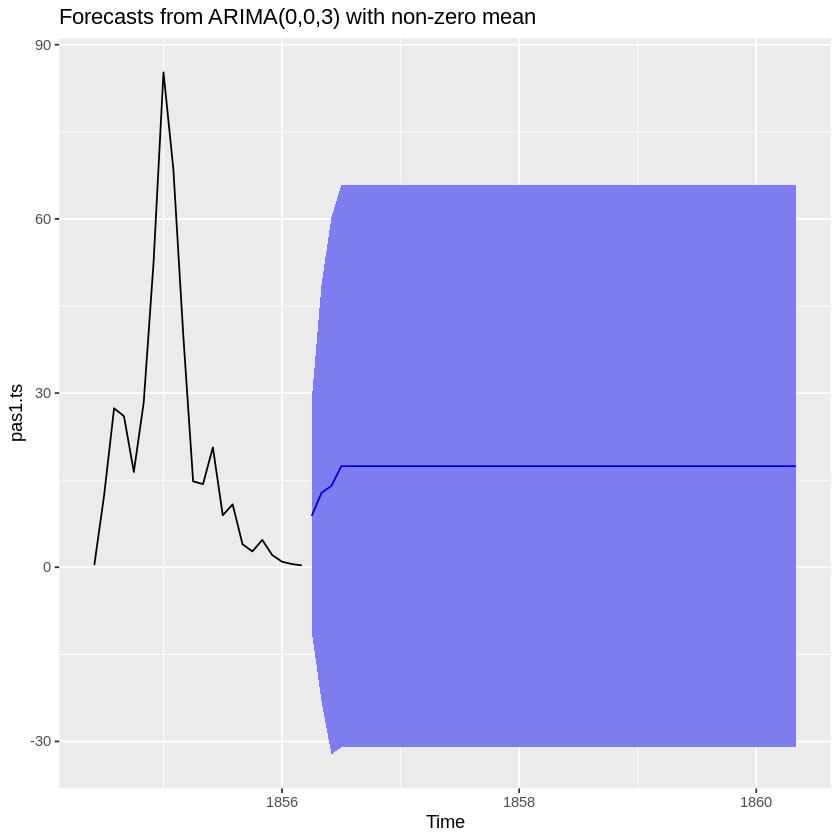

In [ ]:
autoplot(forecast1, ts.colour = "firebrick1", predict.colour = "red",
         predict.linetype = "dashed", conf.int = FALSE)

## Season plots

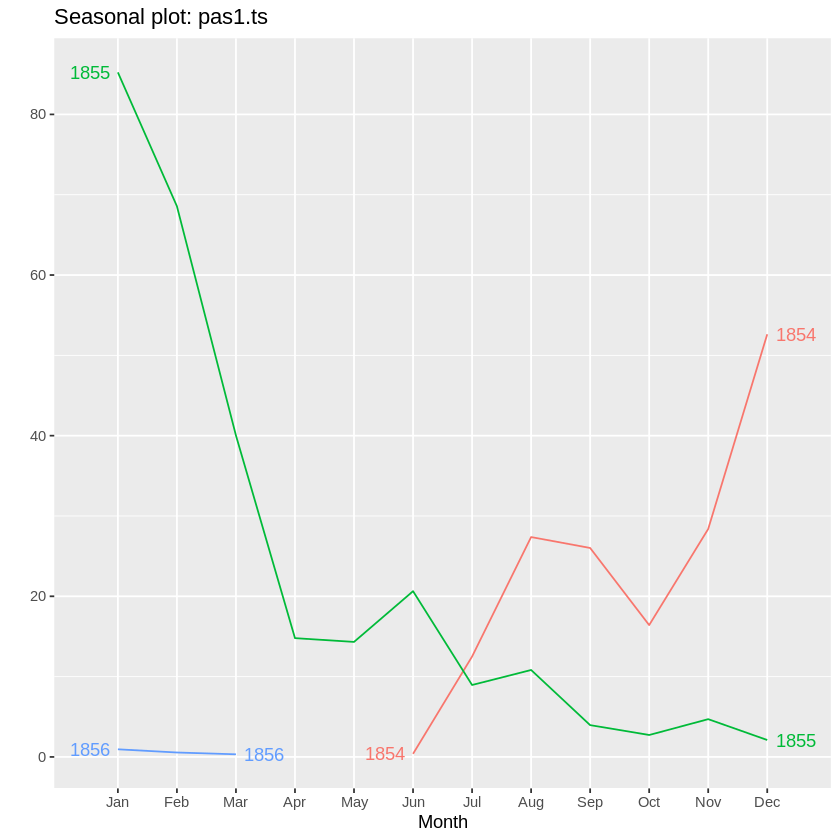

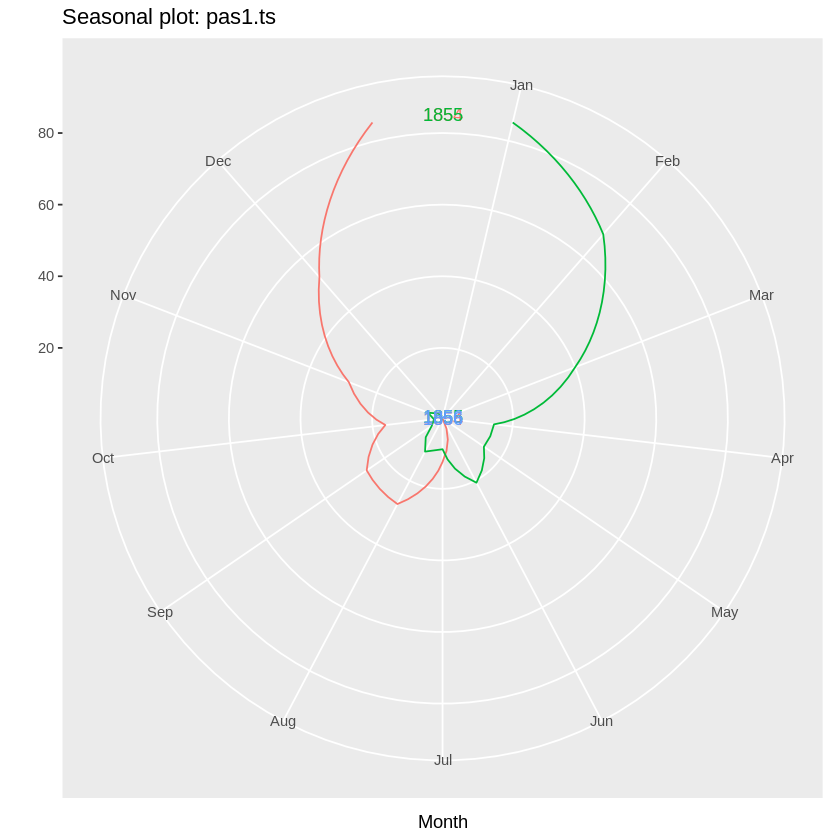

In [ ]:
forecast::ggseasonplot(pas1.ts, year.labels=TRUE, year.labels.left=TRUE)
forecast::ggseasonplot(pas1.ts, year.labels=TRUE, year.labels.left=TRUE, polar = TRUE)

## Ruido Gaussiano linealmente dependiente en el tiempo

In [ ]:
alpha <- 1
beta <- 0.1
t <- 1:22
mu <- alpha + beta*t

fit <- lm(pas1.ts ~ t)     #calcula la regresión  lm=modelo lineal
summary(fit)    #slow y el interceptro   y=ax+b



Call:
lm(formula = pas1.ts ~ t)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.239  -6.964  -5.483  -1.099  59.620 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  38.2002     9.3660   4.079 0.000585 ***
t            -1.5732     0.7131  -2.206 0.039237 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.22 on 20 degrees of freedom
Multiple R-squared:  0.1957,	Adjusted R-squared:  0.1555 
F-statistic: 4.867 on 1 and 20 DF,  p-value: 0.03924


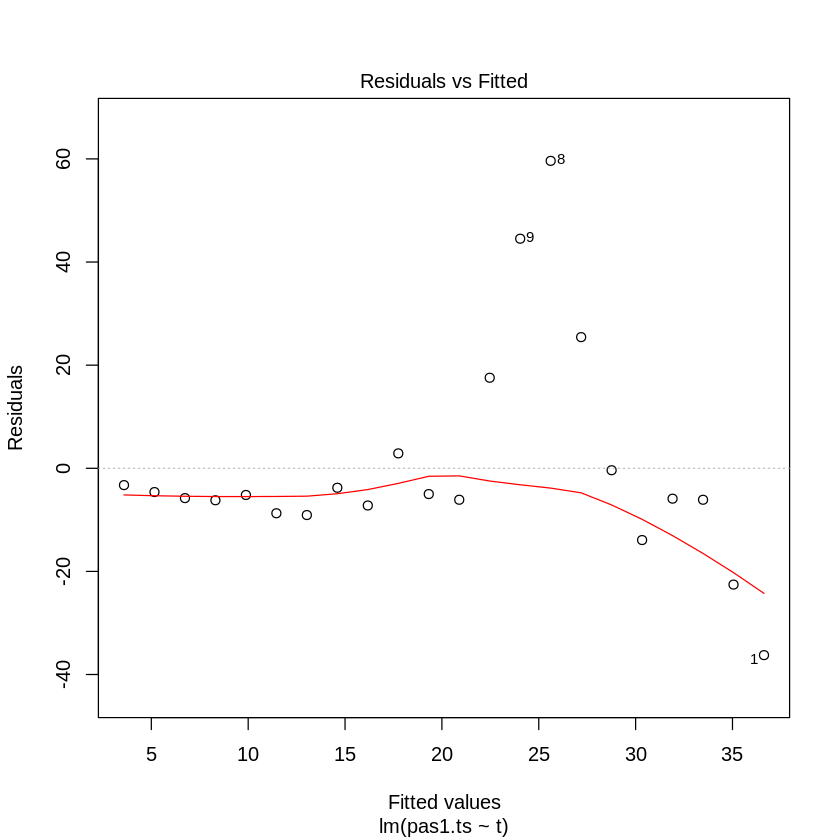

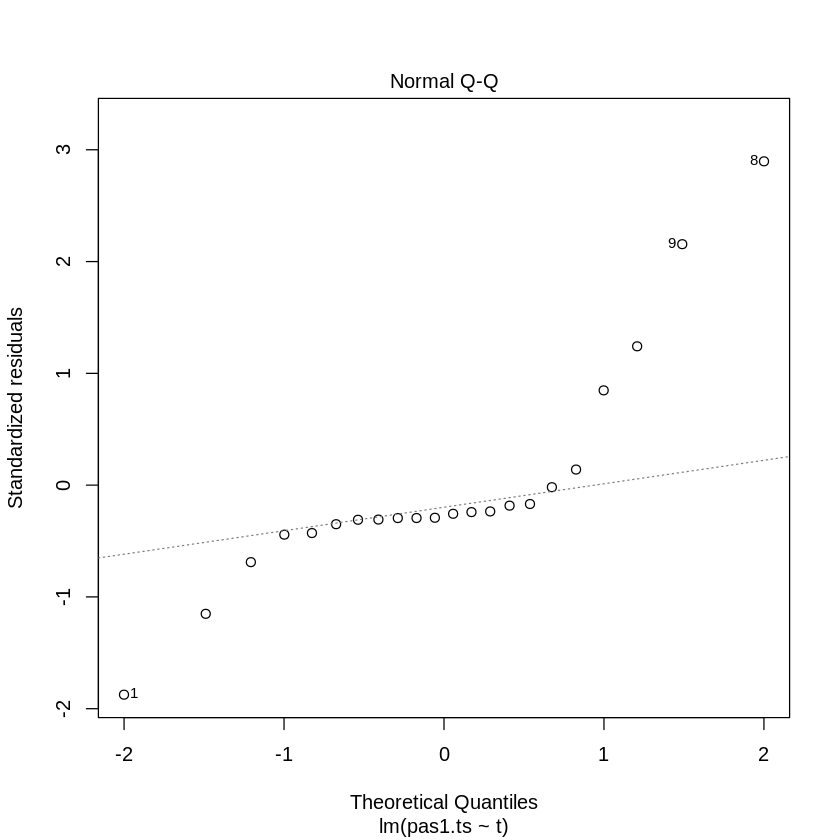

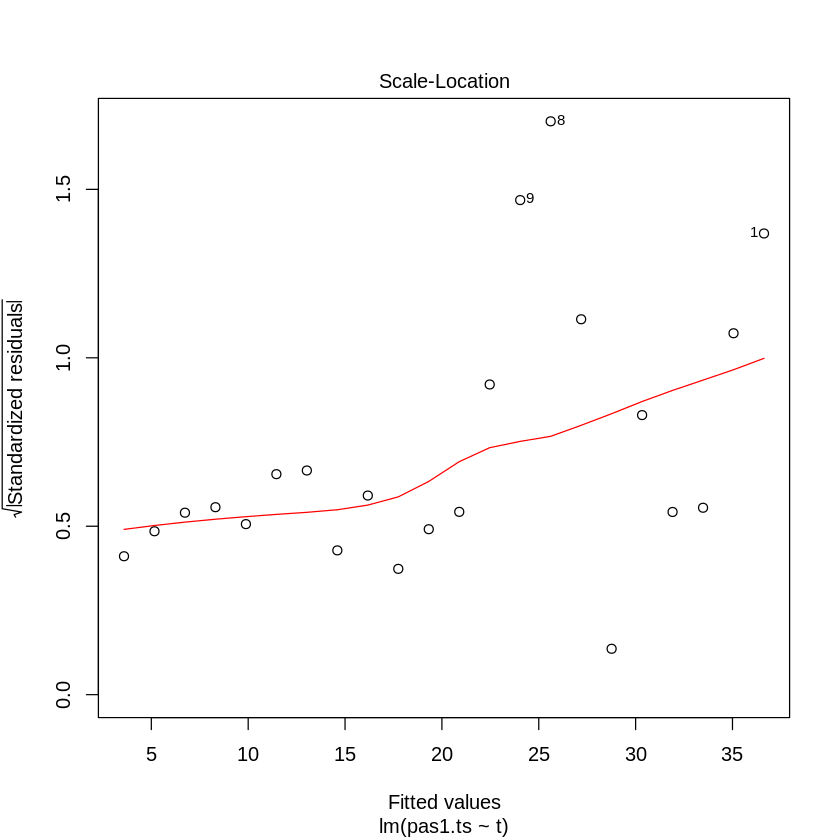

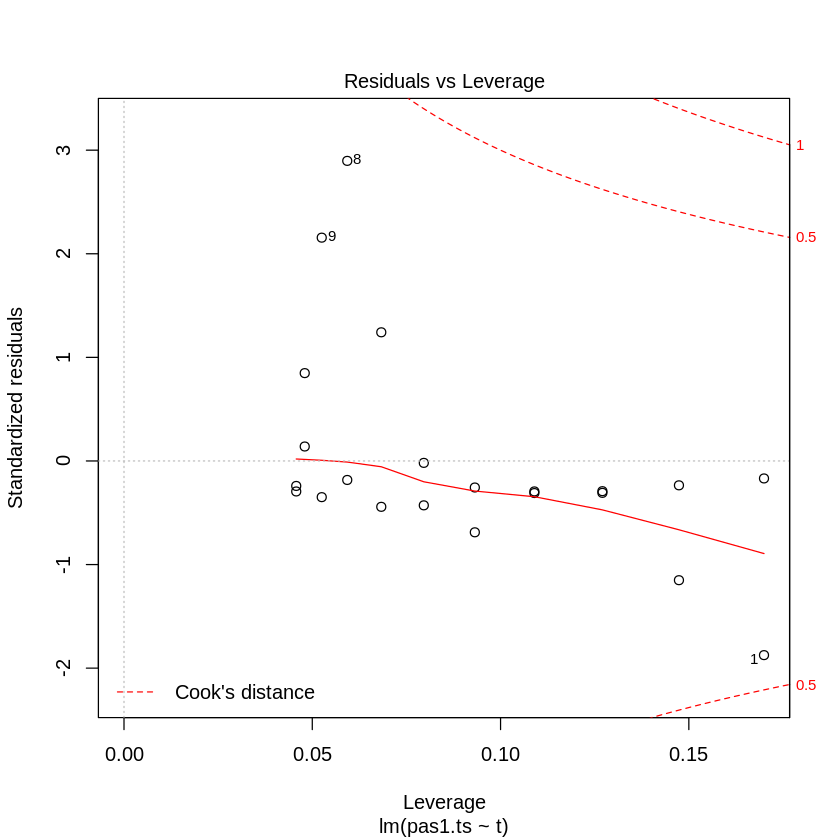

In [ ]:
plot(fit)

Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.



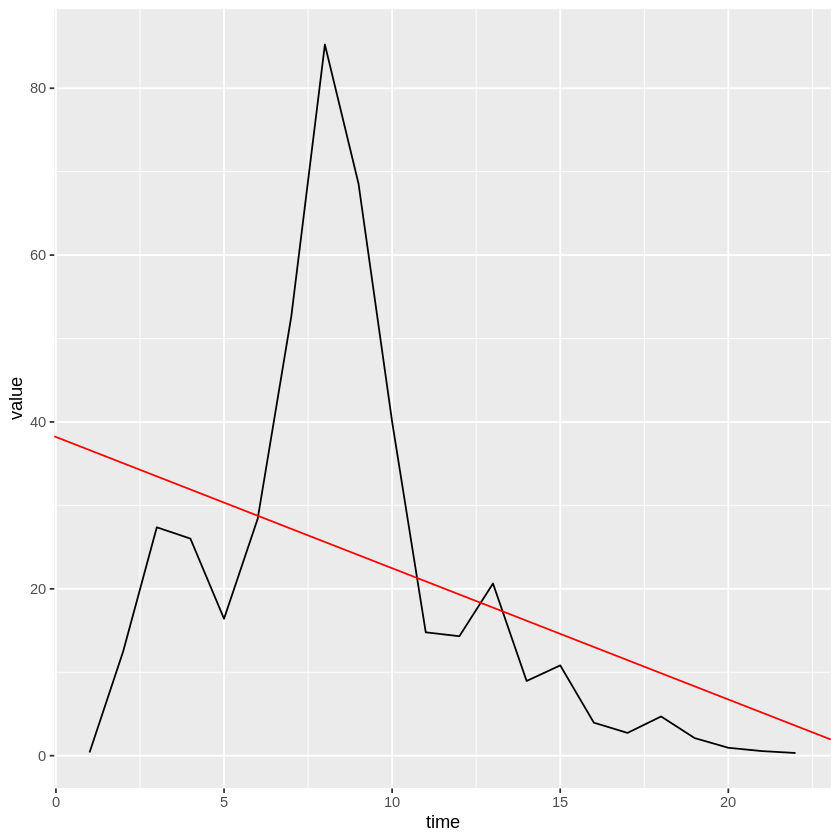

In [ ]:
dplyr::tibble(time = t, value = pas1.ts) %>%
  ggplot2::ggplot(ggplot2::aes(x = time, y = value)) +
  ggplot2::geom_line() +
  ggplot2::geom_abline(intercept = fit$coefficients[1], slope = fit$coefficients[2], col = "red")   #quiero calcular la lina roja con una regresión

In [ ]:
# SOI= LA SERIE TEMPORAL
# REC= CANTIDAD DE PECES QUE SE HAN PESCADO
soi.lag6 <- xts::lag.xts(pas1.ts,6)  # desplazar una serie temporal 6 veces, con lo que x1 es igual a y7, x2 igual a y8, x3 igual a y9....
fit <- lm(pas2.ts ~ soi.lag6)    # esta es la relación que hace
summary(fit)


Call:
lm(formula = pas2.ts ~ soi.lag6)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4551 -1.0010 -0.5978  0.2863  3.2081 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.77900    0.59724   1.304   0.2132  
soi.lag6     0.04480    0.01687   2.656   0.0188 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.55 on 14 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.335,	Adjusted R-squared:  0.2875 
F-statistic: 7.053 on 1 and 14 DF,  p-value: 0.01882


Warning message:
“attributes are not identical across measure variables;
they will be dropped”


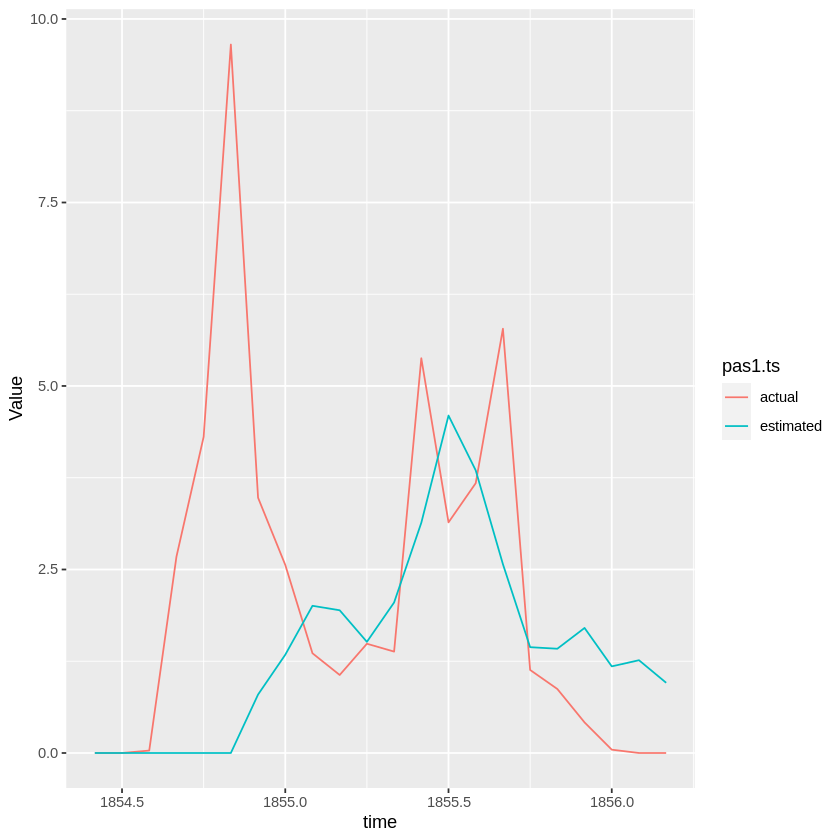

In [ ]:
dplyr::tibble(time = zoo::index(pas2.ts), 
              actual = zoo::coredata(pas2.ts),
              estimated = c(rep(0,6),fit$fitted.values)) %>%
  tidyr::gather(pas1.ts, Value, -time) %>%
  ggplot2::ggplot(ggplot2::aes(x = time, y = Value, col = pas1.ts)) +
  ggplot2::geom_line()

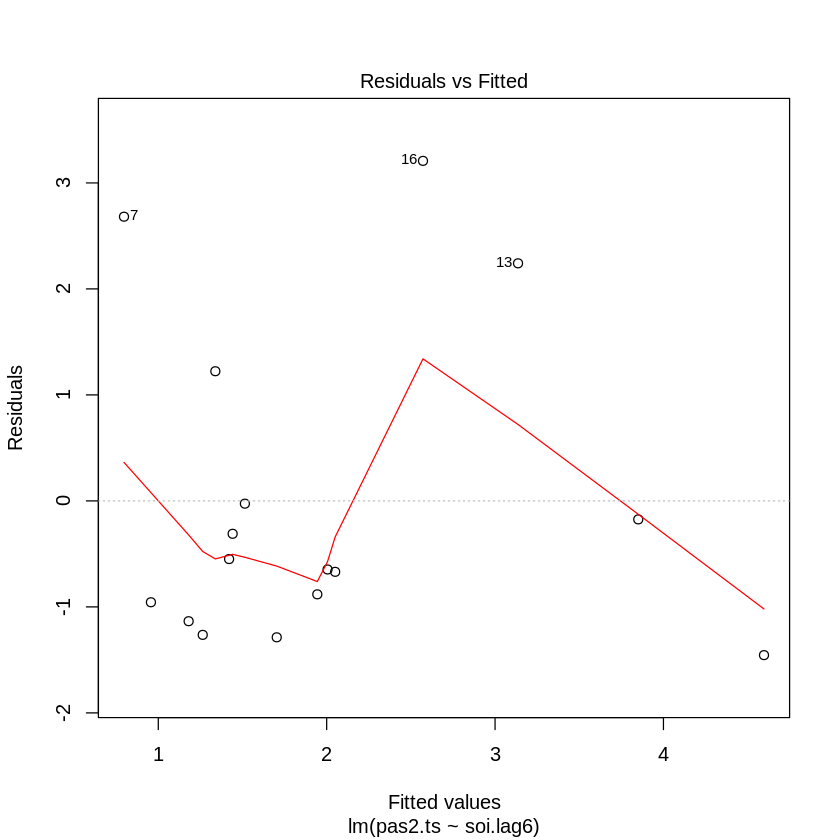

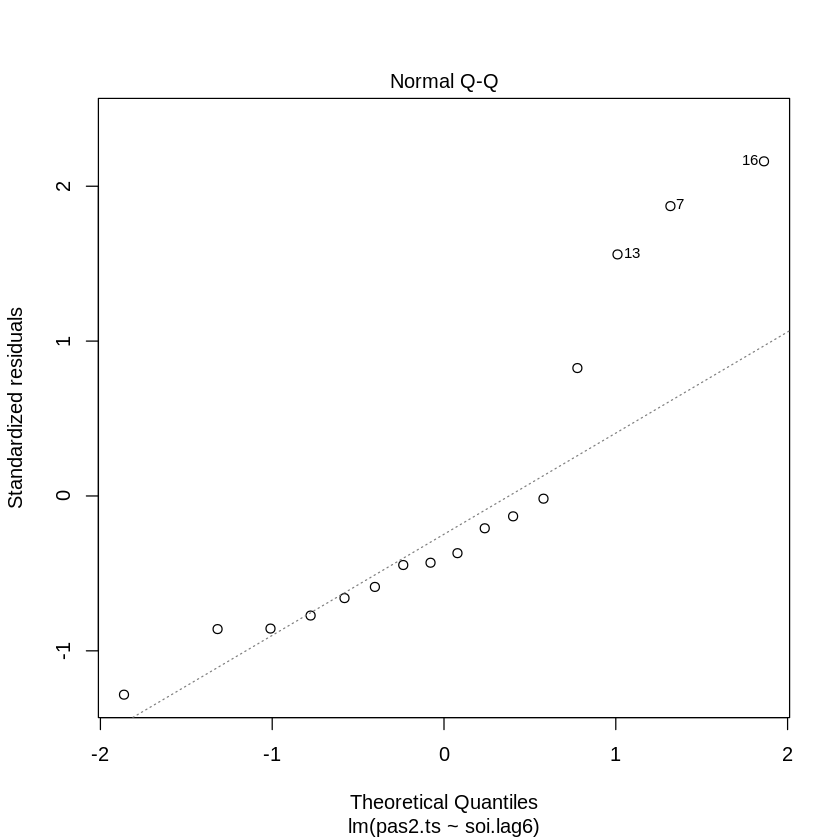

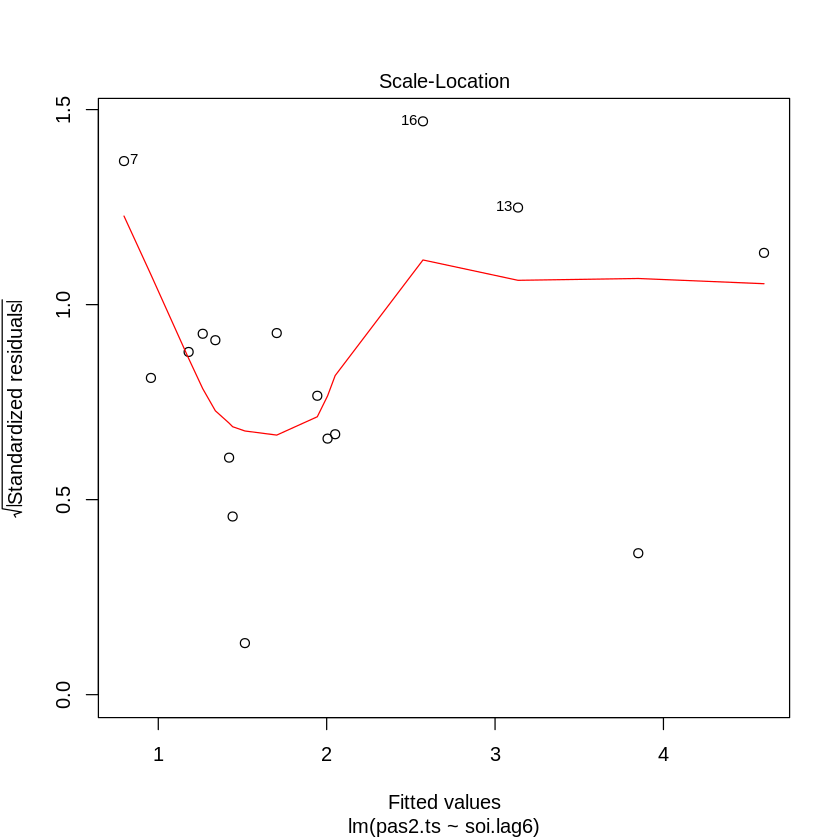

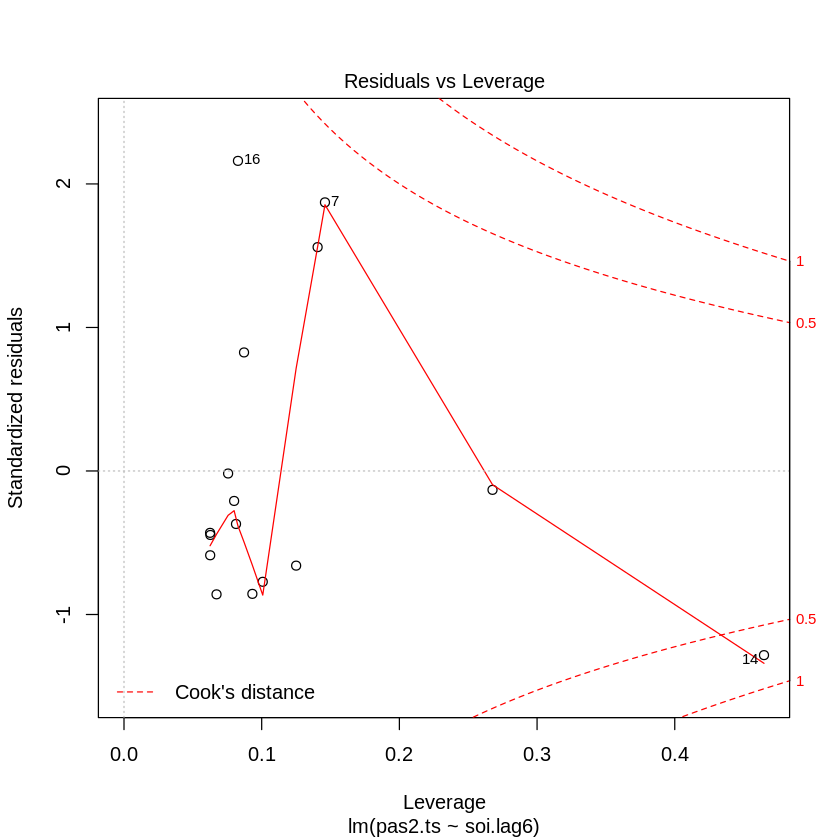

In [ ]:
plot(fit)

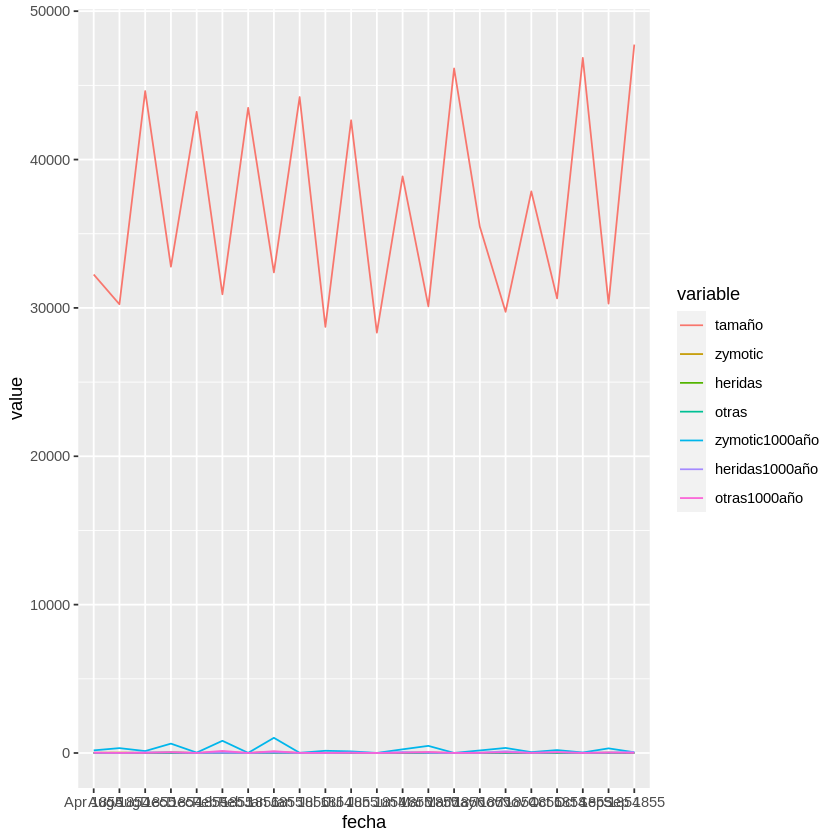

In [ ]:
# library(reshape2)
meltdf <- melt(d,id="fecha")
ggplot(meltdf,aes(x=fecha,y=value,colour=variable,group=variable)) + geom_line()

## tslm rewritten

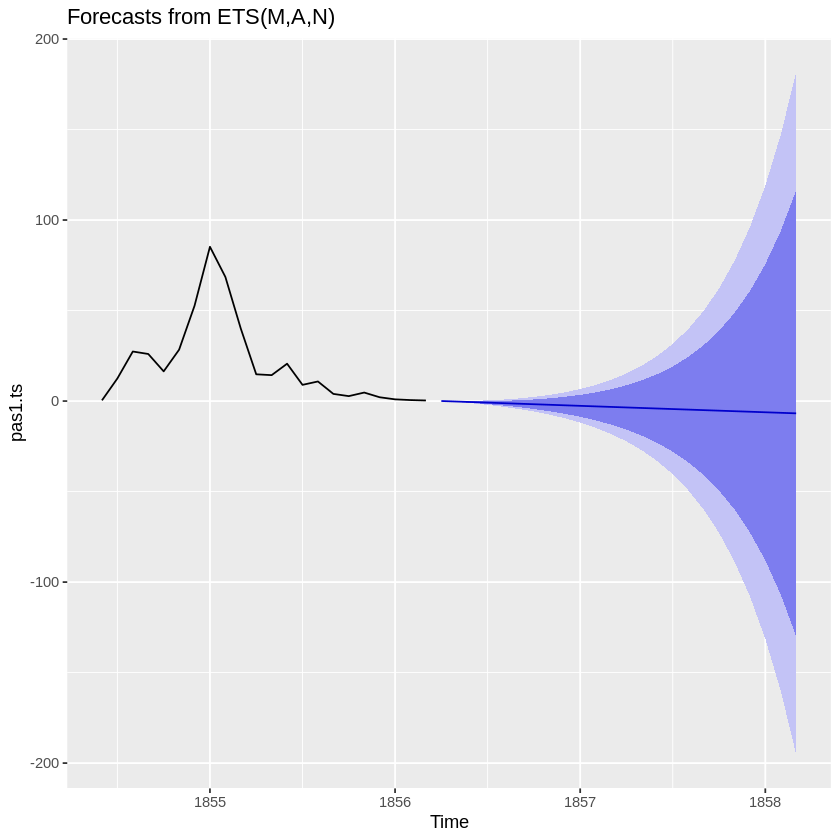

In [ ]:
# autoplot of a forecast object
fc <- forecast::forecast(pas1.ts)
autoplot(fc)

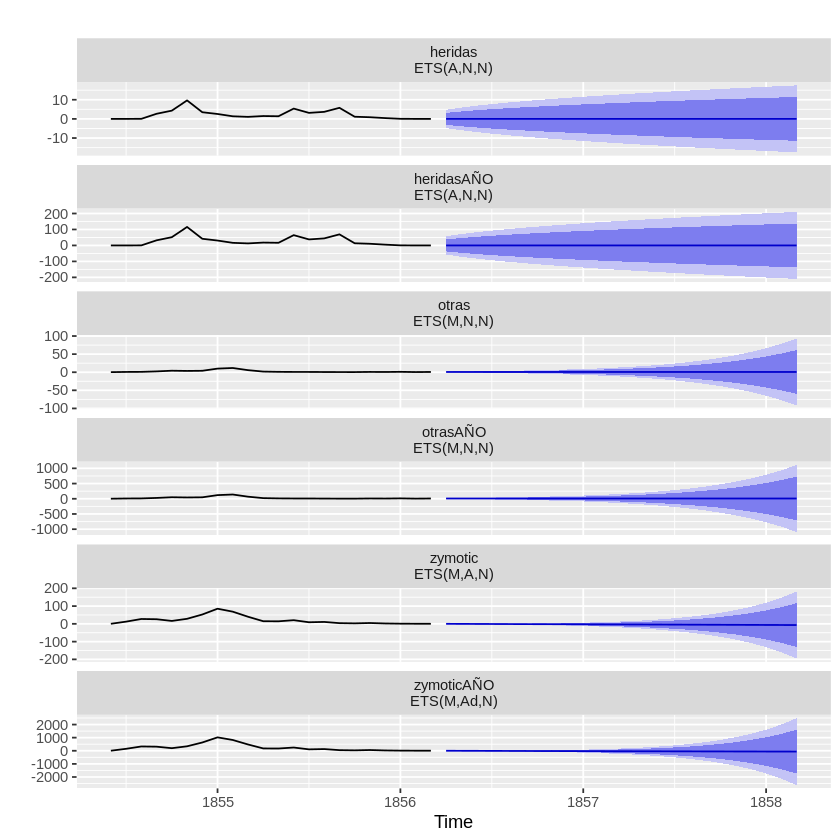

In [ ]:
# autoplot of a forecast object
fc <- forecast::forecast(pass.ts)
autoplot(fc)

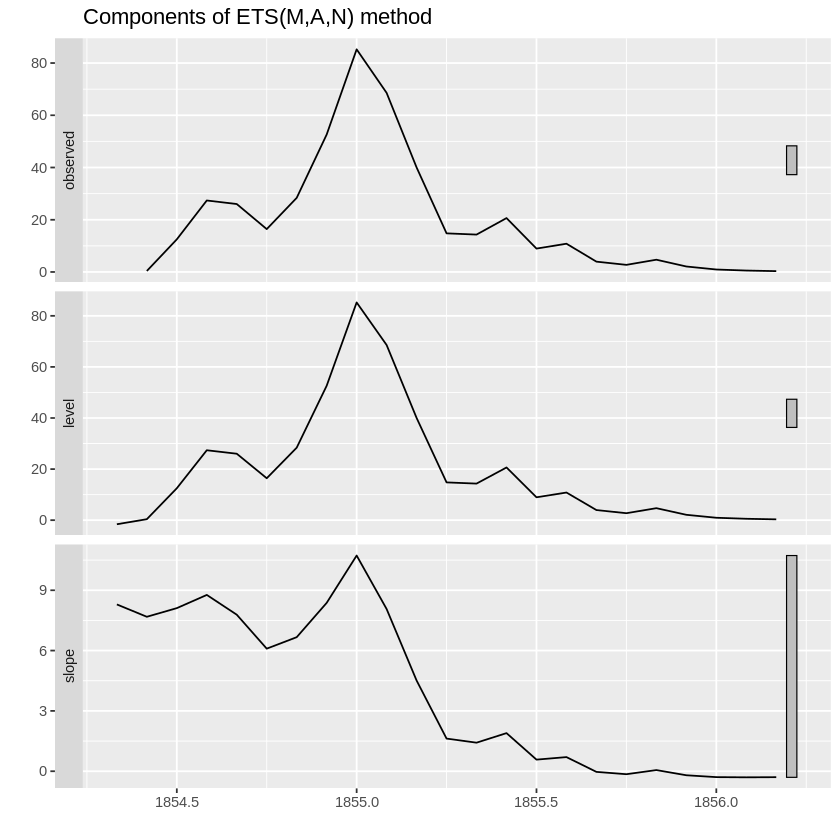

In [ ]:
# Plotting the components of an ETS model
fit <- forecast::ets(pas1.ts)
autoplot(fit)

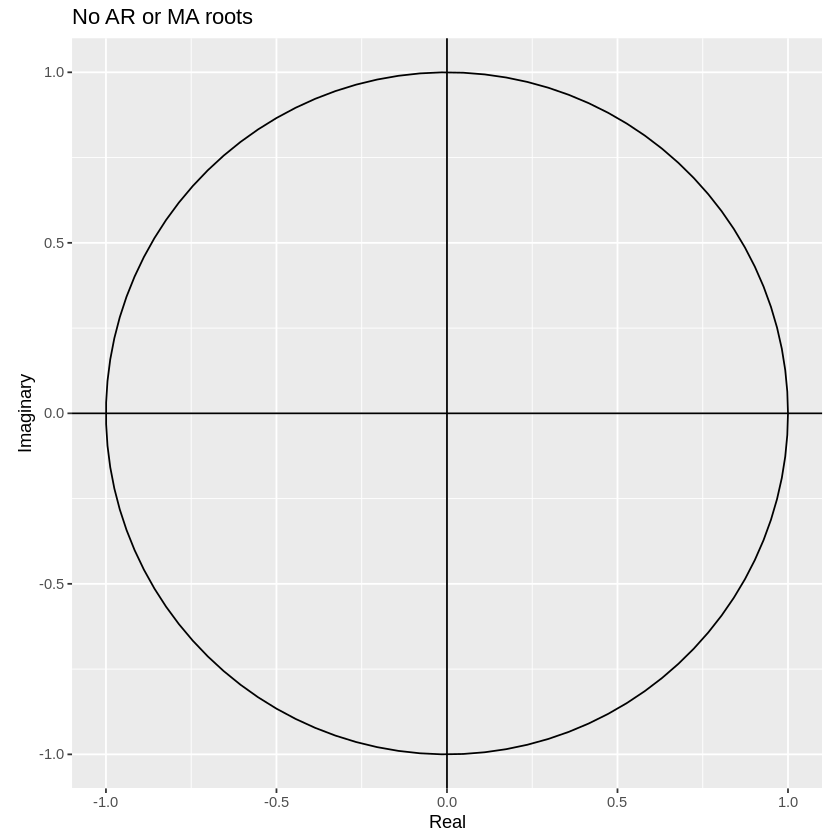

In [ ]:
# Plotting the inverse characteristic roots of an ARIMA model
fit <- forecast::auto.arima(pas1.ts, D=1)
autoplot(fit)

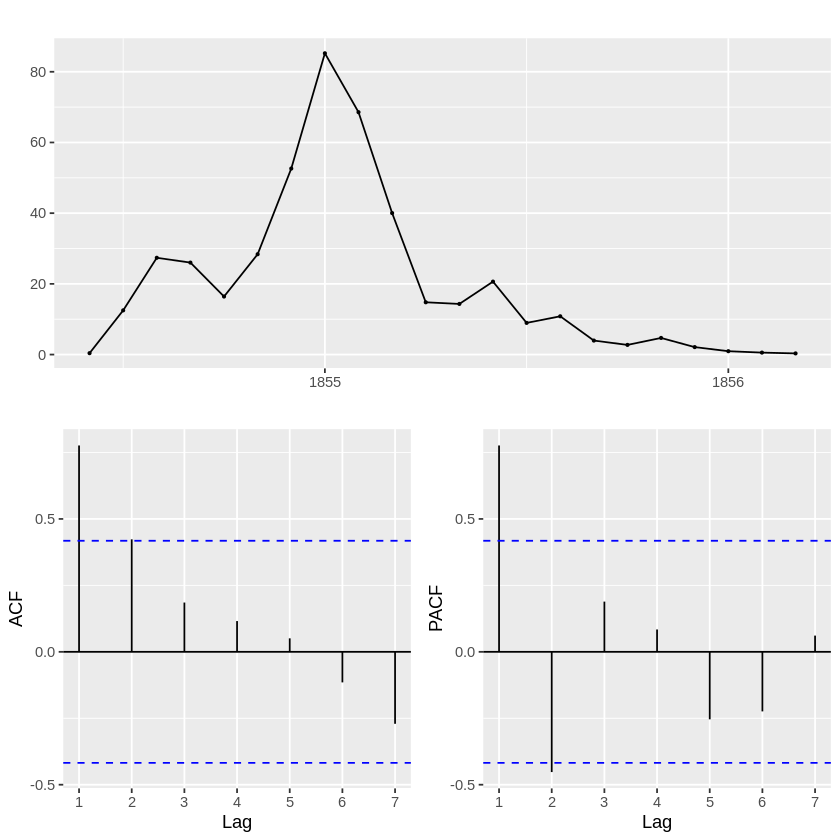

In [ ]:
ggtsdisplay(pas1.ts)

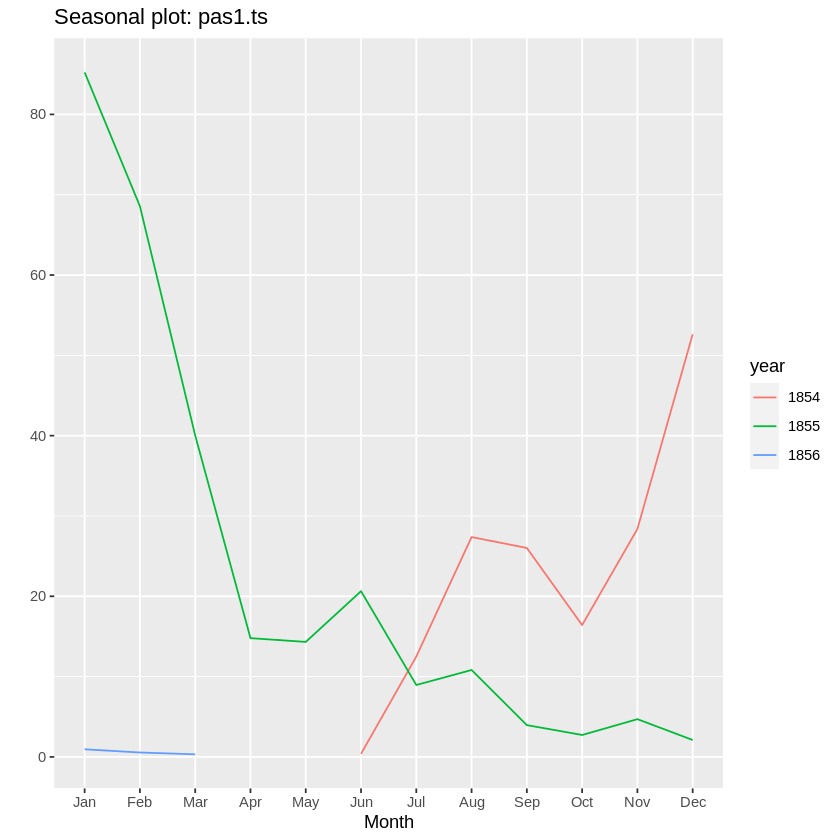

In [ ]:
ggseasonplot(pas1.ts)

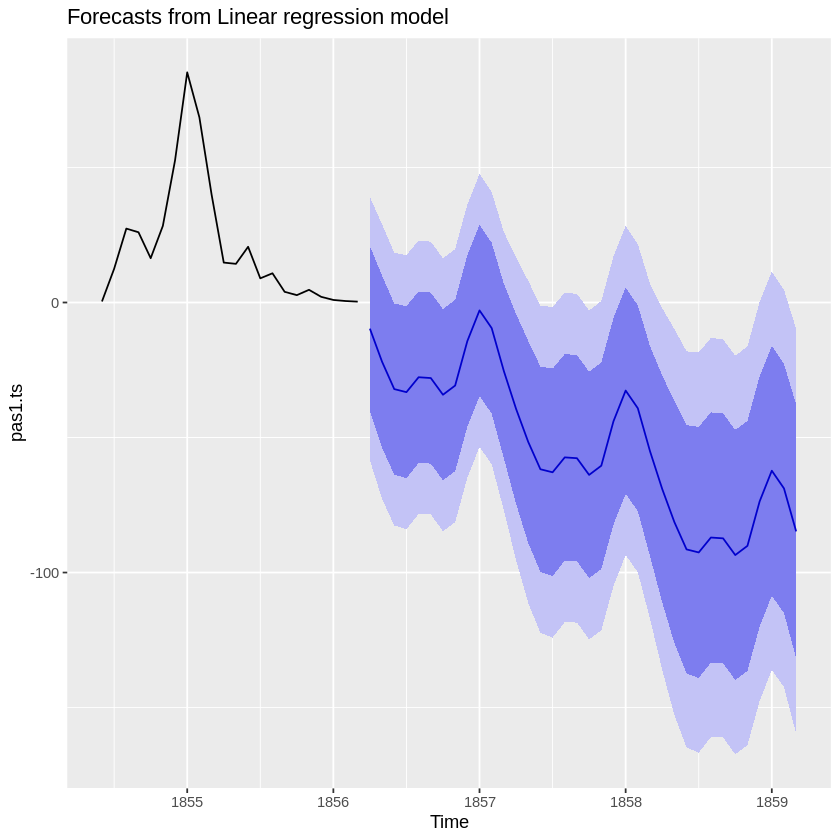

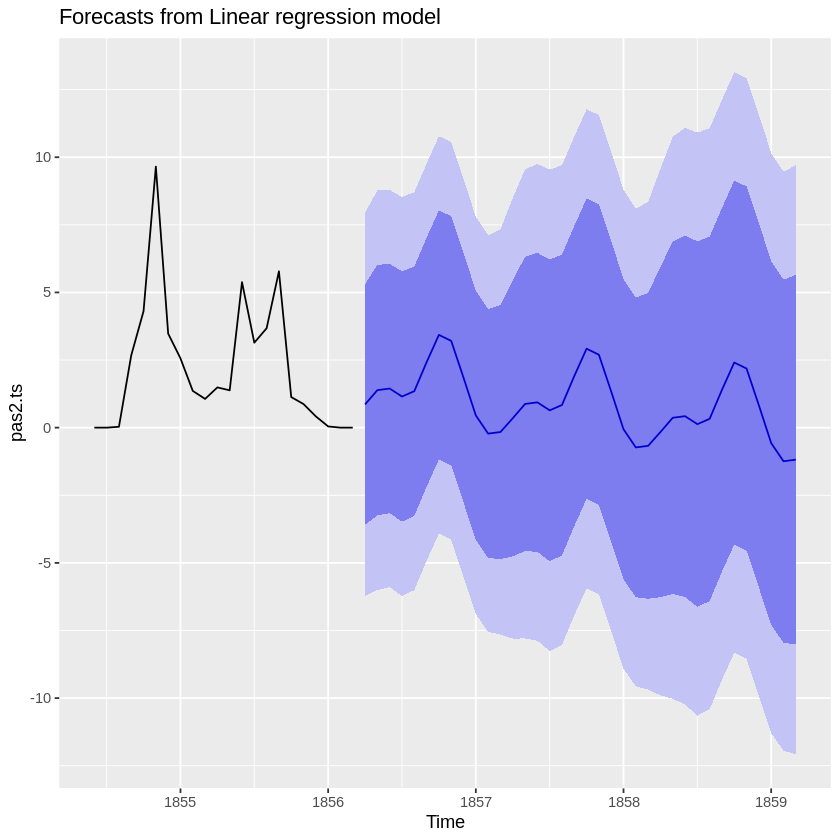

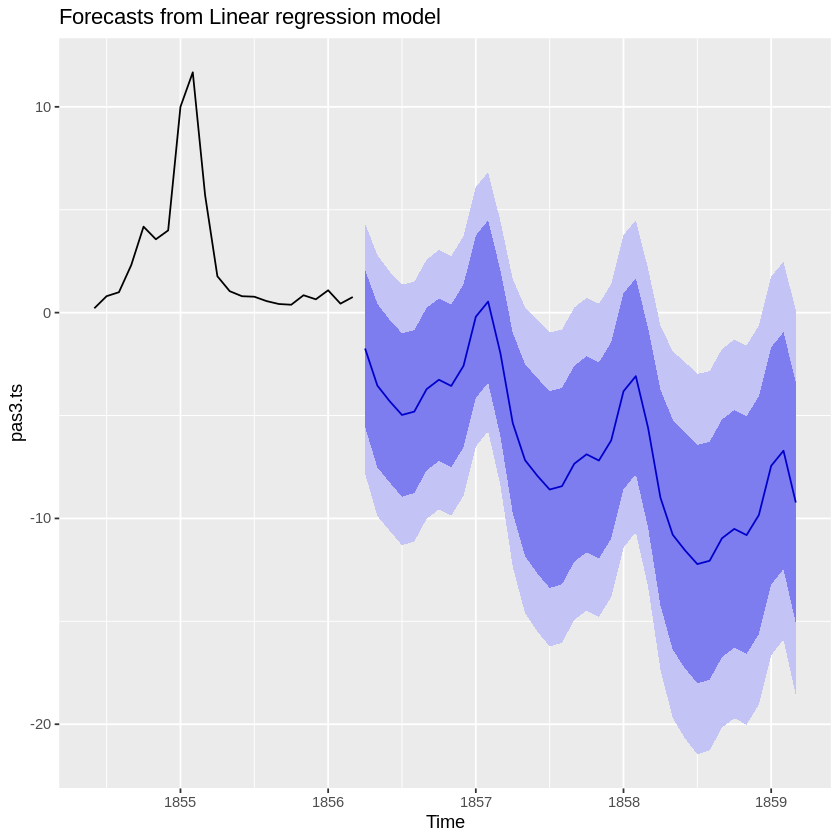

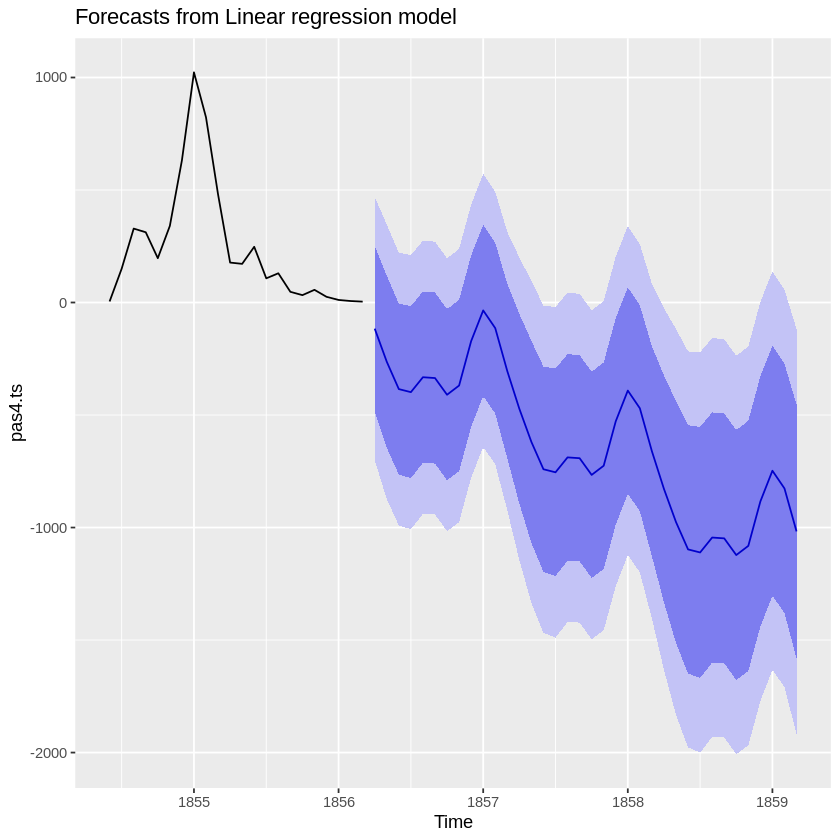

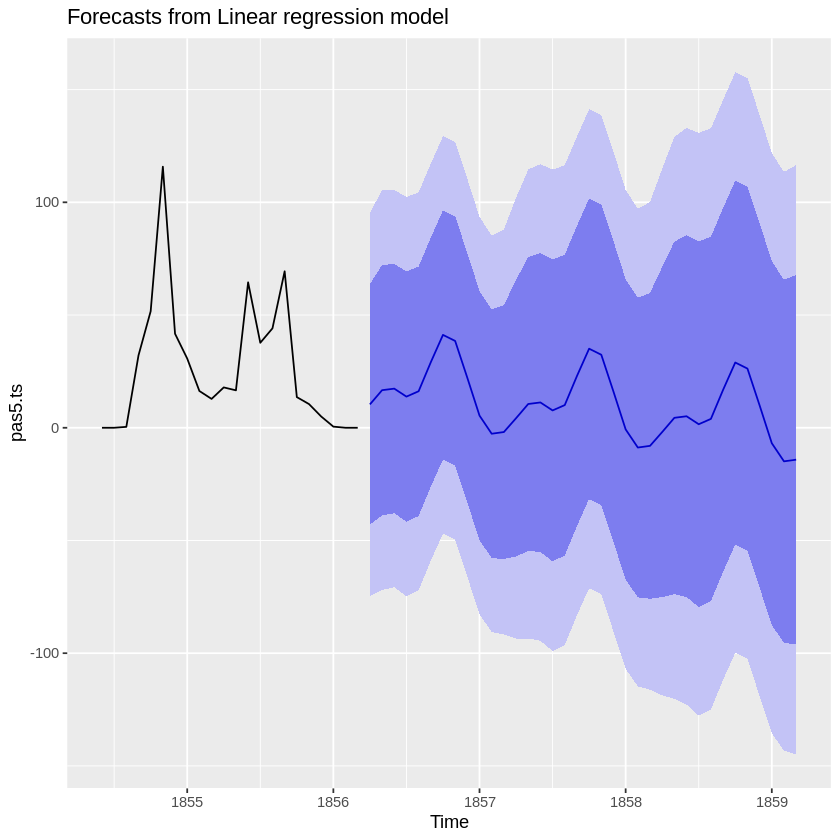

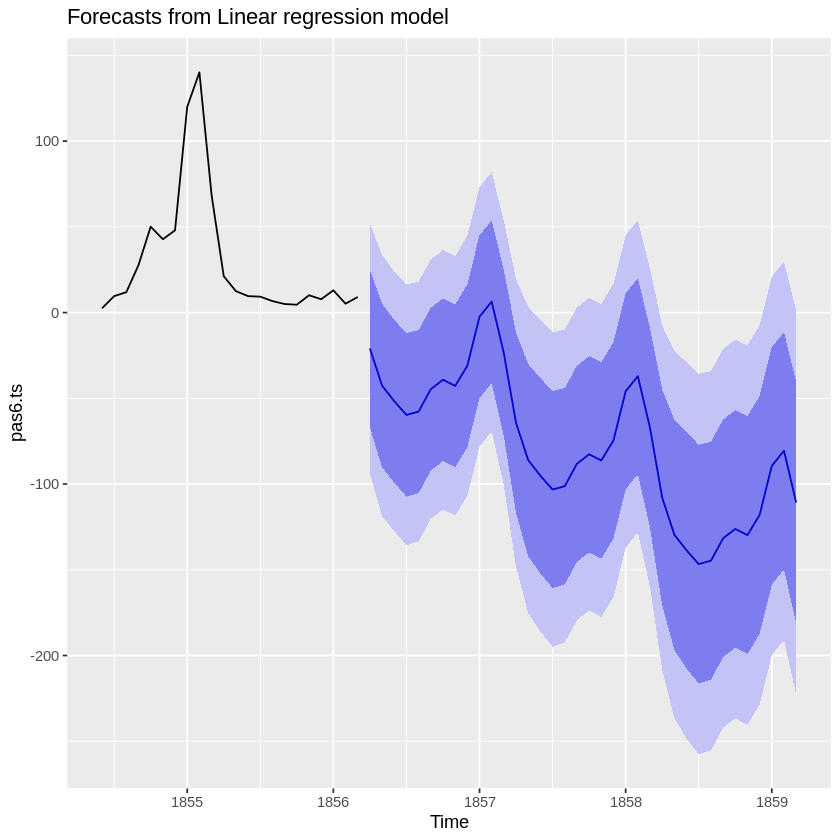

In [ ]:
deaths.lm  <- tslm(pas1.ts ~ trend + fourier(pas1.ts,3))
mdeaths.fcast <- forecast(deaths.lm,
    data.frame(fourier(pas1.ts,3,36)))
autoplot(mdeaths.fcast)
deaths.lm  <- tslm(pas2.ts ~ trend + fourier(pas2.ts,3))
mdeaths.fcast <- forecast(deaths.lm,
    data.frame(fourier(pas2.ts,3,36)))
autoplot(mdeaths.fcast)
deaths.lm  <- tslm(pas3.ts ~ trend + fourier(pas3.ts,3))
mdeaths.fcast <- forecast(deaths.lm,
    data.frame(fourier(pas3.ts,3,36)))
autoplot(mdeaths.fcast)
deaths.lm  <- tslm(pas4.ts ~ trend + fourier(pas4.ts,3))
mdeaths.fcast <- forecast(deaths.lm,
    data.frame(fourier(pas4.ts,3,36)))
autoplot(mdeaths.fcast)
deaths.lm  <- tslm(pas5.ts ~ trend + fourier(pas5.ts,3))
mdeaths.fcast <- forecast(deaths.lm,
    data.frame(fourier(pas5.ts,3,36)))
autoplot(mdeaths.fcast)
deaths.lm  <- tslm(pas6.ts ~ trend + fourier(pas6.ts,3))
mdeaths.fcast <- forecast(deaths.lm,
    data.frame(fourier(pas6.ts,3,36)))
autoplot(mdeaths.fcast)

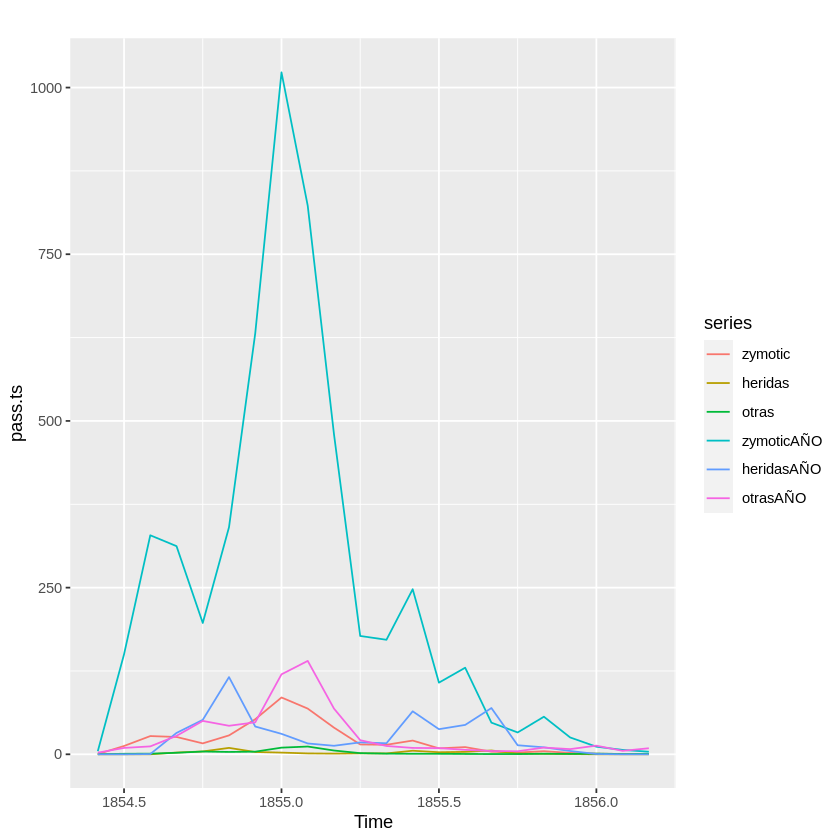

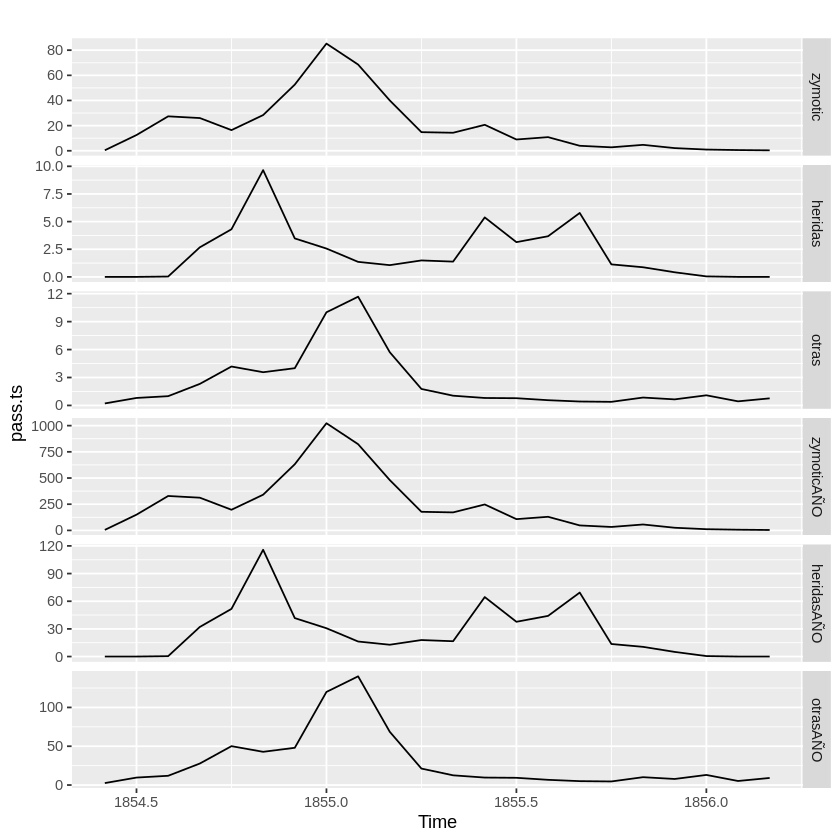

In [ ]:
# left
autoplot(pass.ts)

# right
autoplot(pass.ts, facets = TRUE)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



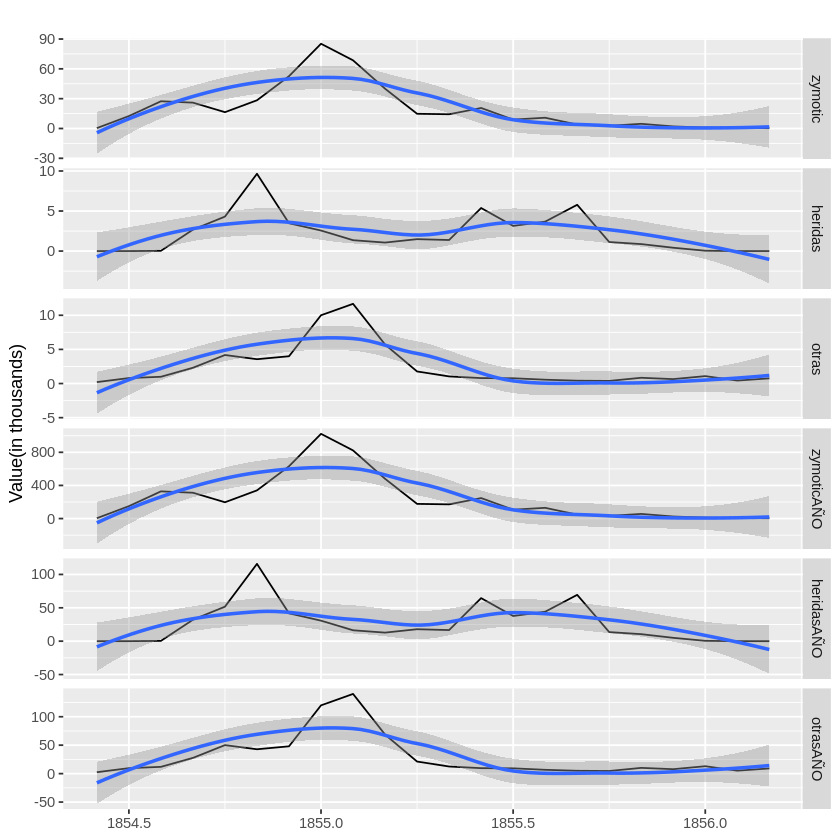

In [ ]:
autoplot(pass.ts, facets = TRUE) +
  geom_smooth() +
  labs("Muertes y tasa",
       y = "Value(in thousands)",
       x = NULL)

ERROR while rich displaying an object: Error in farver::decode_colour(colors, alpha = TRUE, to = "lab", na_value = "transparent"): unused argument (na_value = "transparent")

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = e

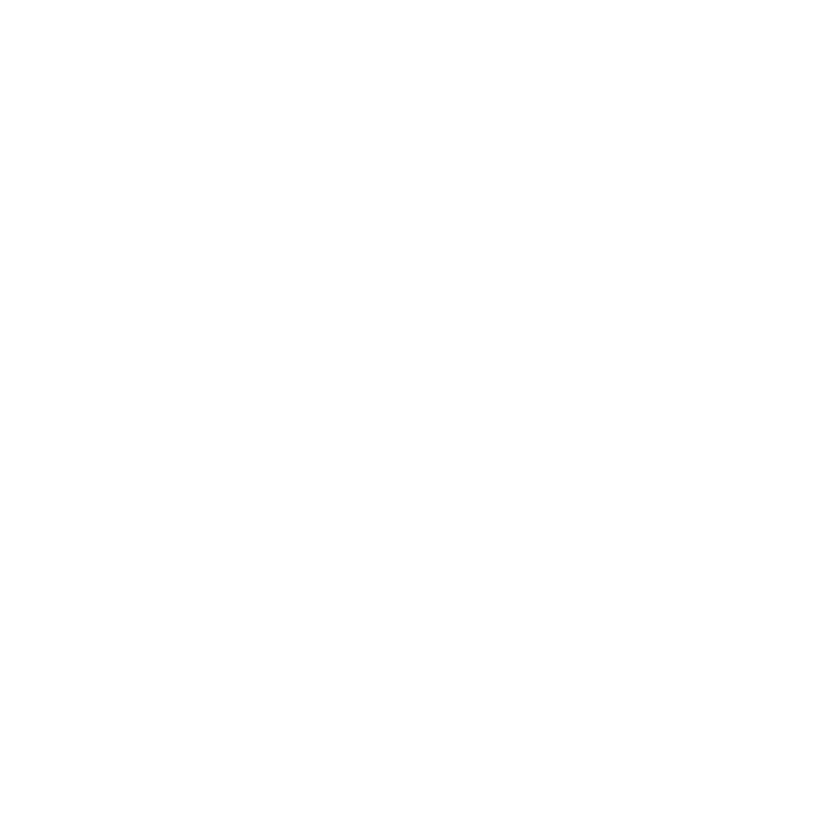

In [ ]:
ggseasonplot(pas1.ts, year.labels=FALSE, continuous=TRUE)

ERROR while rich displaying an object: Error in farver::decode_colour(colors, alpha = TRUE, to = "lab", na_value = "transparent"): unused argument (na_value = "transparent")

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = e

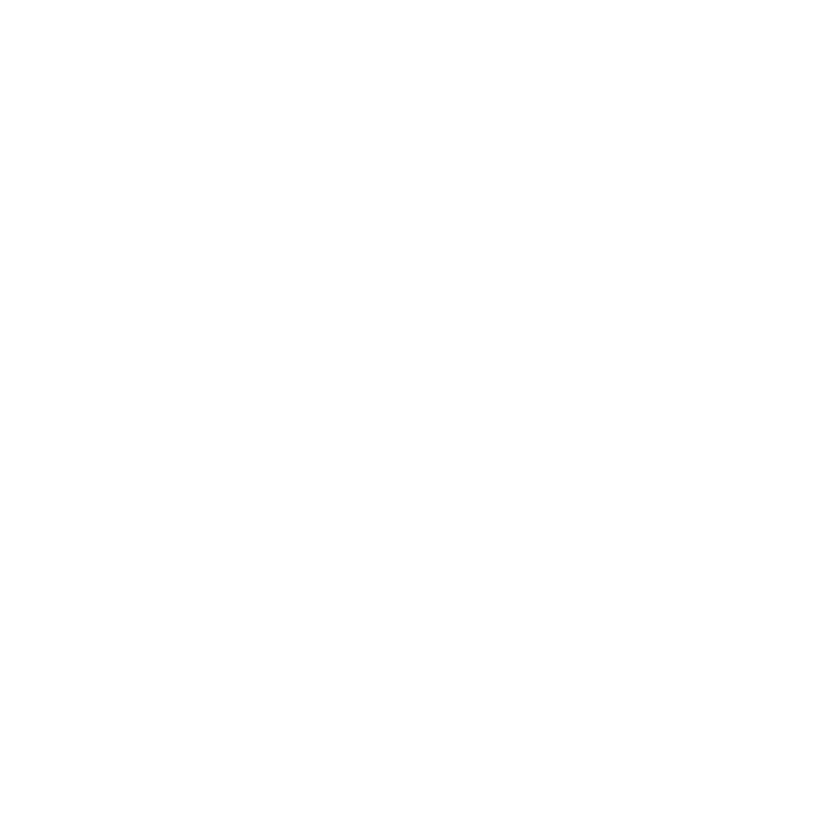

In [ ]:
ggseasonplot(pas1.ts, year.labels=FALSE, continuous=TRUE, polar = TRUE)

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



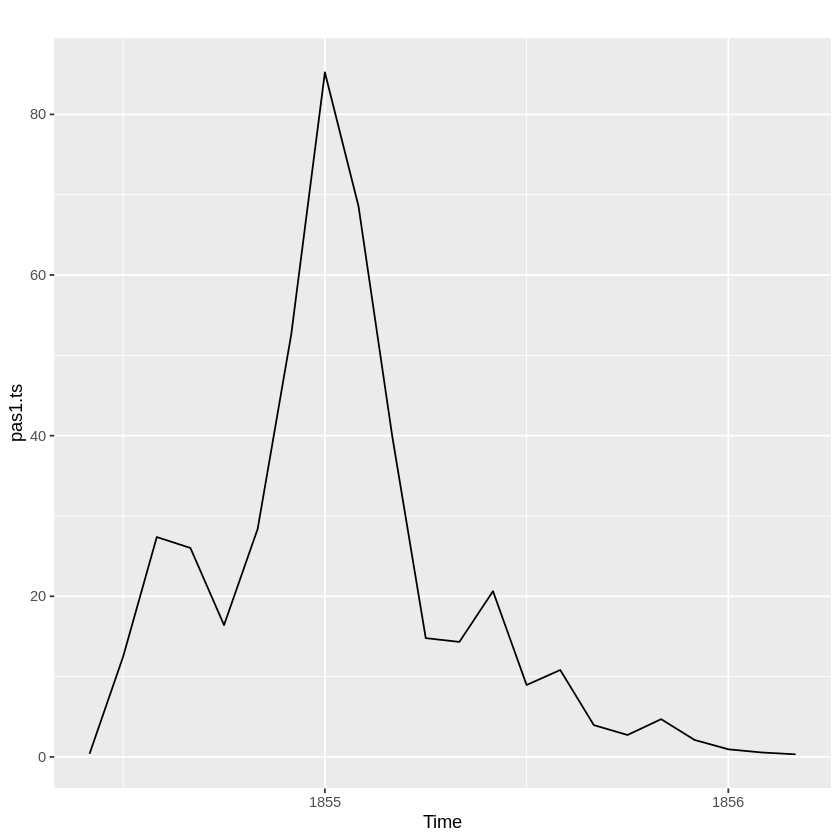

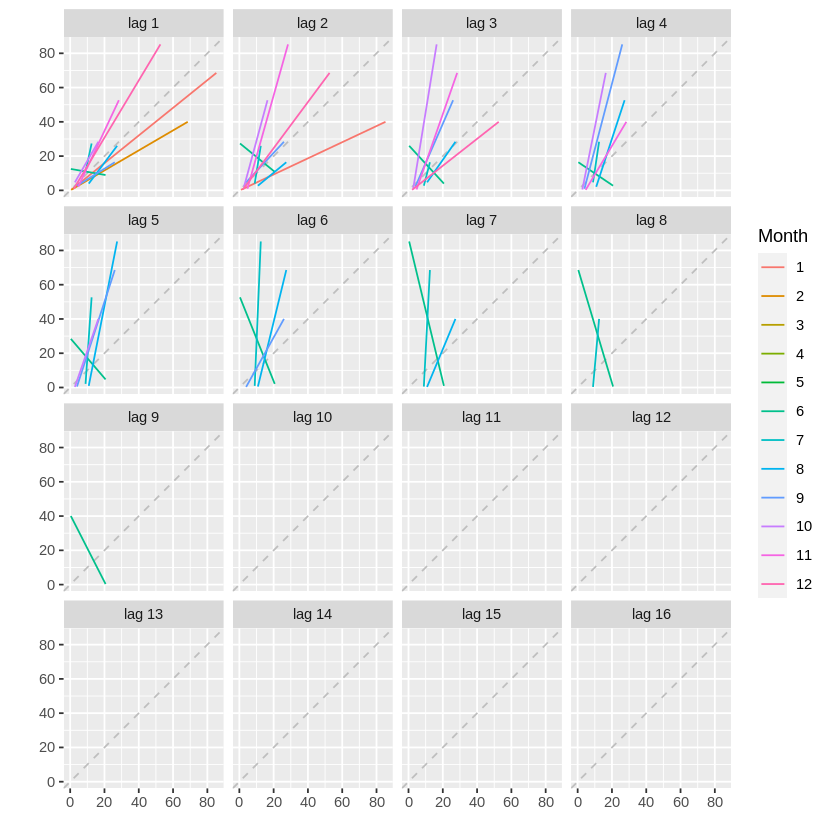

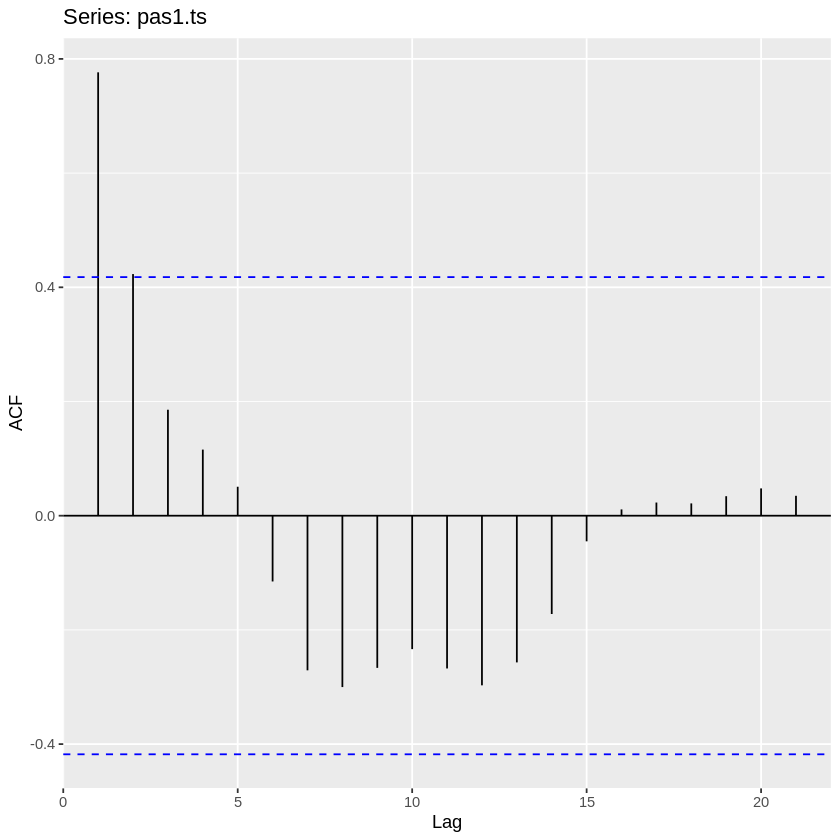

In [ ]:
# left: autoplot of the beer data
autoplot(pas1.ts)

# middle: lag plot of the beer data
gglagplot(pas1.ts)

# right: ACF plot of the beer data
ggAcf(pas1.ts)

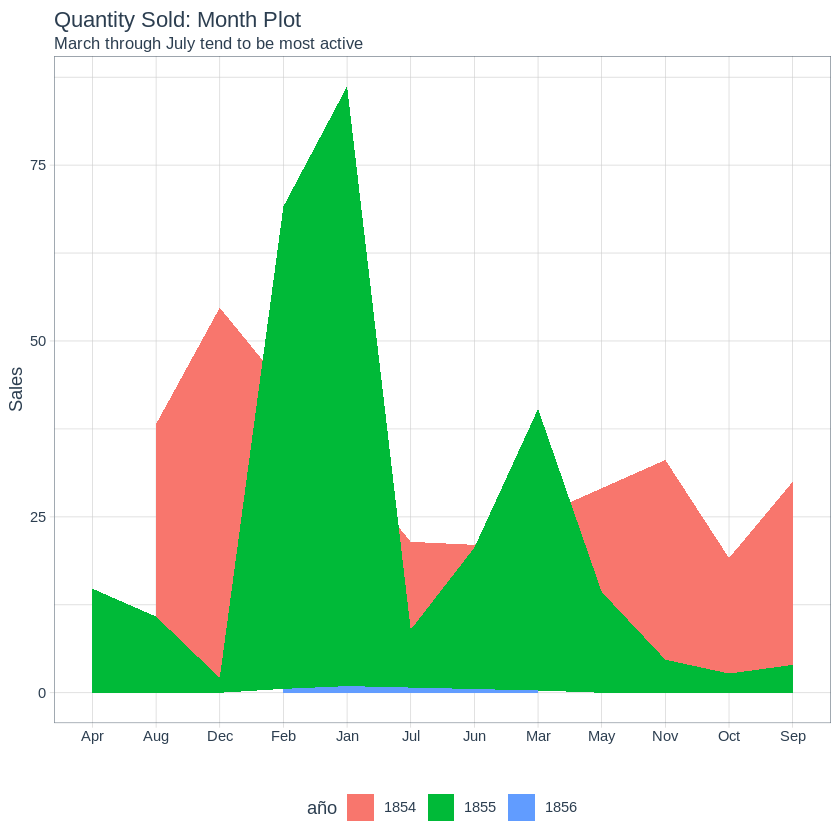

In [ ]:
#library(tidyquant)
df %>%
    ggplot(aes(x = mes, y = zymotic, group = año)) +
    geom_area(aes(fill = año), position = "stack") +
    labs(title = "Quantity Sold: Month Plot", x = "", y = "Sales",
         subtitle = "March through July tend to be most active") +
    scale_y_continuous() +
    theme_tq()

In [ ]:
dygraph(pass.ts, main = "New Haven Temperatures") %>%
  dyRangeSelector()


HTML widgets cannot be represented in plain text (need html)

In [ ]:
dygraph(pass.ts, main="Muertes") %>%
  dySeries(label="valor por mil", color="black") %>%
  dyShading(from="1800-1-1", to="1855-1-1", color="#FFE6E6") %>%
  dyShading(from="1856-1-1", to="2000-1-1", color="#CCEBD6")

HTML widgets cannot be represented in plain text (need html)

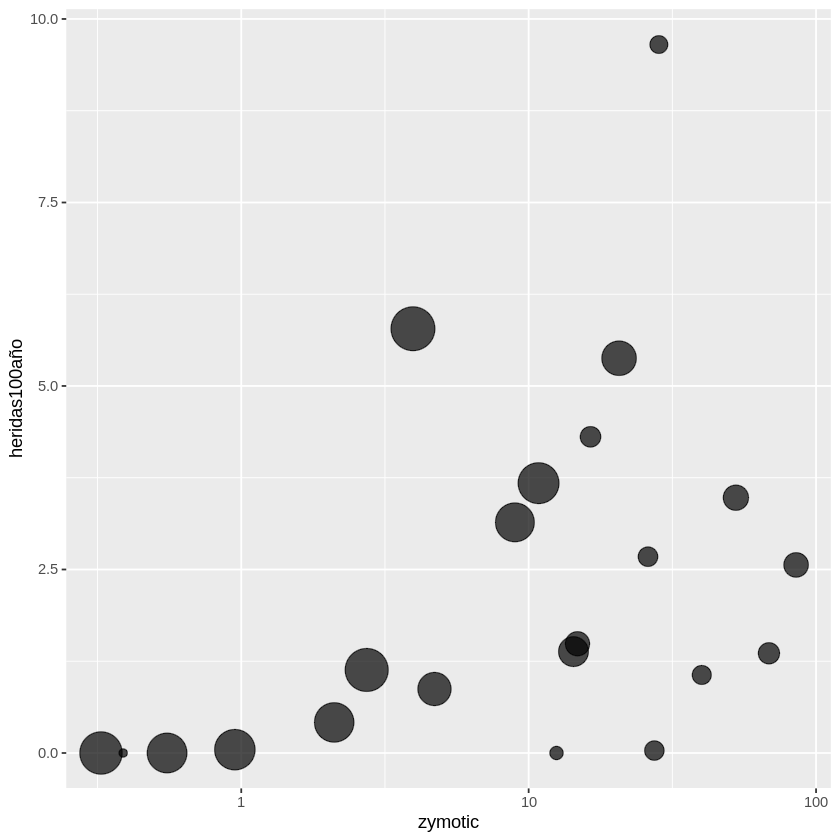

In [ ]:
p <- ggplot(d, aes(x = zymotic, y=heridas, size = tamaño)) +
  geom_point(show.legend = FALSE, alpha = 0.7) +
  scale_color_viridis_d() +
  scale_size(range = c(2, 12)) +
  scale_x_log10() +
  labs(x = "zymotic", y = "heridas100año")
p

In [ ]:
dygraph(pass.ts, main="Muertes") %>%
  dySeries(label="valor por mil", color="black") %>%
  dyShading(from="1800-1-1", to="1855-1-1", color="#FFE6E6") %>%
  dyShading(from="1856-1-1", to="2000-1-1", color="#CCEBD6")

HTML widgets cannot be represented in plain text (need html)

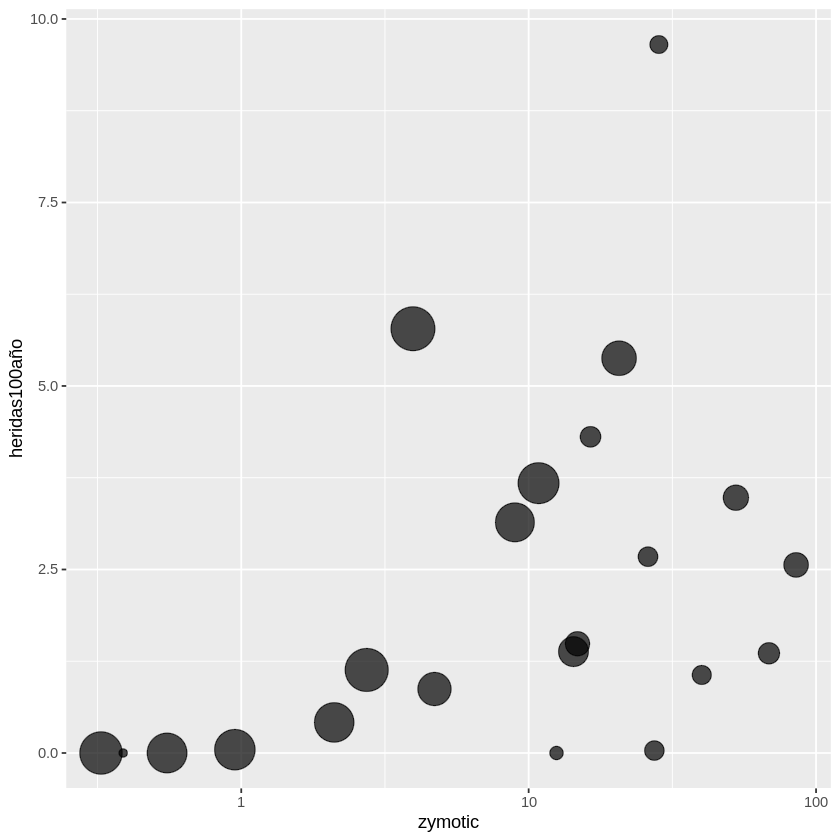

In [ ]:
p <- ggplot(d, aes(x = zymotic, y=heridas, size = tamaño)) +
  geom_point(show.legend = FALSE, alpha = 0.7) +
  scale_color_viridis_d() +
  scale_size(range = c(2, 12)) +
  scale_x_log10() +
  labs(x = "zymotic", y = "heridas100año")
p



ERROR: ignored